NFL Big Data Bowl 2021
Unsupervised Task for Identifying of the Best Defensive Schemes

Cluster Analysis is Known as Unsupervised Learning. I used the approach UMAP (Uniform Manifold Approximation and Projection), that is a dimension reduction algorithm developed by Leland McInnes (https://github.com/lmcinnes), together with the Gaussian Mixture Model Scikit-learn package and the Python Data Science Handbook by Jake VanderPlas (https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html).

I define a set features from the exploration, tracking data. The influencia of different features in clustering, choosing which features to include through parameters mean and variance.I'm doing cluster analysis, my goal is to find those observations that are more similar.The UMAP uses exponential probability distribuition to compute the similarity between high dimensional data points.

In [236]:
 pip install --upgrade matplotlib numpy pandas scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [237]:
pip install pip==21.1.2 --upgrade

Note: you may need to restart the kernel to use updated packages.


In [238]:
pip install seaborn

In [239]:
pip install umap-learn[plot]

Note: you may need to restart the kernel to use updated packages.


In [240]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import random
import math
import umap
import umap.plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
sns.set()

In [241]:
df_dataset_games = pd.read_csv('datasets\games.csv',sep=',', parse_dates=True)
df_dataset_games.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [242]:
df_dataset_games.gameDate.str.slice(0,10).value_counts(ascending=True)

12/13/2018     1
10/18/2018     1
09/24/2018     1
11/12/2018     1
10/29/2018     1
10/25/2018     1
11/26/2018     1
11/08/2018     1
10/15/2018     1
10/08/2018     1
10/04/2018     1
09/06/2018     1
09/27/2018     1
11/29/2018     1
11/19/2018     1
12/17/2018     1
09/17/2018     1
12/10/2018     1
11/01/2018     1
11/05/2018     1
12/06/2018     1
09/20/2018     1
12/03/2018     1
10/11/2018     1
09/13/2018     1
10/01/2018     1
10/22/2018     1
11/15/2018     1
12/24/2018     1
12/22/2018     2
12/15/2018     2
09/10/2018     2
11/22/2018     3
09/09/2018    10
11/18/2018    11
11/04/2018    11
11/25/2018    11
11/11/2018    12
12/16/2018    12
10/21/2018    12
10/28/2018    12
10/07/2018    13
09/30/2018    13
12/23/2018    13
10/14/2018    13
12/09/2018    14
09/16/2018    14
09/23/2018    14
12/02/2018    14
12/30/2018    16
Name: gameDate, dtype: int64

In [243]:
gameDateTimeEaster = df_dataset_games.gameDate.str.cat(df_dataset_games.gameTimeEastern, sep=' ')

In [244]:
df_dataset_games['gameDateTimeEaster'] = pd.to_datetime(gameDateTimeEaster, dayfirst=False, yearfirst=False, format='%m/%d/%y %H:%M:%S', infer_datetime_format =True)

In [245]:
df_dataset_games.dtypes

gameId                         int64
gameDate                      object
gameTimeEastern               object
homeTeamAbbr                  object
visitorTeamAbbr               object
week                           int64
gameDateTimeEaster    datetime64[ns]
dtype: object

In [246]:
df_dataset_games.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,gameDateTimeEaster
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1,2018-09-06 20:20:00
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1,2018-09-09 13:00:00
2,2018090902,09/09/2018,13:00:00,IND,CIN,1,2018-09-09 13:00:00
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1,2018-09-09 13:00:00
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1,2018-09-09 13:00:00


In [247]:
df_dataset_games.drop(df_dataset_games.columns[[1,2]], axis=1, inplace=True)
df_dataset_games.tail()

,gameId,homeTeamAbbr,visitorTeamAbbr,week,gameDateTimeEaster
248,2018123013,DEN,LAC,17,2018-12-30 16:25:00
249,2018123015,SEA,ARI,17,2018-12-30 16:25:00
250,2018123014,LA,SF,17,2018-12-30 16:25:00
251,2018122200,TEN,WAS,16,2018-12-22 16:30:00
252,2018122201,LAC,BAL,16,2018-12-22 20:20:00


In [248]:
df_dataset_games['gameDateTimeEaster'] = df_dataset_games['gameDateTimeEaster'].dt.tz_localize('US/Eastern')

In [249]:
df_dataset_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype                     
---  ------              --------------  -----                     
 0   gameId              253 non-null    int64                     
 1   homeTeamAbbr        253 non-null    object                    
 2   visitorTeamAbbr     253 non-null    object                    
 3   week                253 non-null    int64                     
 4   gameDateTimeEaster  253 non-null    datetime64[ns, US/Eastern]
dtypes: datetime64[ns, US/Eastern](1), int64(2), object(2)
memory usage: 10.0+ KB


In [250]:
df_dataset_games.head()

,gameId,homeTeamAbbr,visitorTeamAbbr,week,gameDateTimeEaster
0,2018090600,PHI,ATL,1,2018-09-06 20:20:00-04:00
1,2018090901,CLE,PIT,1,2018-09-09 13:00:00-04:00
2,2018090902,IND,CIN,1,2018-09-09 13:00:00-04:00
3,2018090903,MIA,TEN,1,2018-09-09 13:00:00-04:00
4,2018090900,BAL,BUF,1,2018-09-09 13:00:00-04:00


In [251]:
df_dataset_games = df_dataset_games[['gameId', 'gameDateTimeEaster', 'homeTeamAbbr', 'visitorTeamAbbr', 'week']]

In [252]:
df_dataset_games.sample(n=5)

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
72,2018100709,2018-10-07 16:25:00-04:00,PHI,MIN,5
5,2018090905,2018-09-09 13:00:00-04:00,NE,HOU,1
103,2018102200,2018-10-22 20:15:00-04:00,ATL,NYG,7
95,2018102102,2018-10-21 13:00:00-04:00,CHI,NE,7
157,2018111900,2018-11-19 20:15:00-05:00,LA,KC,11


In [253]:
df_dataset_games.isnull().sum()

gameId                0
gameDateTimeEaster    0
homeTeamAbbr          0
visitorTeamAbbr       0
week                  0
dtype: int64

In [254]:
df_dataset_games.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
248    False
249    False
250    False
251    False
252    False
Length: 253, dtype: bool

In [255]:
df_dataset_games.nunique()

gameId                253
gameDateTimeEaster    106
homeTeamAbbr           32
visitorTeamAbbr        32
week                   17
dtype: int64

In [256]:
print('Unique values in `state` column:', list(df_dataset_games.homeTeamAbbr.unique()))

Unique values in `state` column: ['PHI', 'CLE', 'IND', 'MIA', 'BAL', 'NE', 'NYG', 'NO', 'ARI', 'CAR', 'GB', 'DET', 'OAK', 'CIN', 'NYJ', 'BUF', 'ATL', 'PIT', 'WAS', 'TEN', 'TB', 'SF', 'LA', 'DEN', 'JAX', 'DAL', 'CHI', 'HOU', 'KC', 'MIN', 'SEA', 'LAC']


In [257]:
df_dataset_games[df_dataset_games[('gameId')] ==2018091001]

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
12,2018091001,2018-09-10 22:20:00-04:00,OAK,LA,1


In [258]:
df_dataset_games[df_dataset_games[('visitorTeamAbbr')] =='JAX']

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
6,2018090907,2018-09-09 13:00:00-04:00,NYG,JAX,1
65,2018100705,2018-10-07 13:00:00-04:00,KC,JAX,5
86,2018101410,2018-10-14 16:25:00-04:00,DAL,JAX,6
136,2018111104,2018-11-11 13:00:00-05:00,IND,JAX,10
161,2018112501,2018-11-25 13:00:00-05:00,BUF,JAX,12
189,2018120600,2018-12-06 20:20:00-05:00,TEN,JAX,14
227,2018122302,2018-12-23 13:00:00-05:00,MIA,JAX,16
237,2018123003,2018-12-30 13:00:00-05:00,HOU,JAX,17


In [259]:
df_dataset_games[df_dataset_games[('week')] == 4]

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
45,2018092700,2018-09-27 20:20:00-04:00,LA,MIN,4
46,2018093002,2018-09-30 13:00:00-04:00,DAL,DET,4
47,2018093003,2018-09-30 13:00:00-04:00,GB,BUF,4
48,2018093004,2018-09-30 13:00:00-04:00,IND,HOU,4
49,2018093001,2018-09-30 13:00:00-04:00,CHI,TB,4
50,2018093000,2018-09-30 13:00:00-04:00,ATL,CIN,4
51,2018093005,2018-09-30 13:00:00-04:00,JAX,NYJ,4
52,2018093007,2018-09-30 13:00:00-04:00,TEN,PHI,4
53,2018093006,2018-09-30 13:00:00-04:00,NE,MIA,4
54,2018093008,2018-09-30 16:05:00-04:00,ARI,SEA,4


In [260]:
df_dataset_games[df_dataset_games[('visitorTeamAbbr')] =='MIN']

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
14,2018091602,2018-09-16 13:00:00-04:00,GB,MIN,2
45,2018092700,2018-09-27 20:20:00-04:00,LA,MIN,4
72,2018100709,2018-10-07 16:25:00-04:00,PHI,MIN,5
93,2018102107,2018-10-21 13:00:00-04:00,NYJ,MIN,7
148,2018111802,2018-11-18 20:20:00-05:00,CHI,MIN,11
186,2018120212,2018-12-02 16:25:00-05:00,NE,MIN,13
204,2018121000,2018-12-10 20:15:00-05:00,SEA,MIN,14
225,2018122307,2018-12-23 13:00:00-05:00,DET,MIN,16


In [261]:
df_dataset_games.loc[df_dataset_games['visitorTeamAbbr'] == 'MIN', 'gameDateTimeEaster'].min()

Timestamp('2018-09-16 13:00:00-0400', tz='US/Eastern')

In [262]:
df_dataset_games.loc[df_dataset_games['visitorTeamAbbr'] == 'MIN', 'gameDateTimeEaster'].max()

Timestamp('2018-12-23 13:00:00-0500', tz='US/Eastern')

In [263]:
df_dataset_games[df_dataset_games[('homeTeamAbbr')] =='KC']

,gameId,gameDateTimeEaster,homeTeamAbbr,visitorTeamAbbr,week
35,2018092305,2018-09-23 13:00:00-04:00,KC,SF,3
65,2018100705,2018-10-07 13:00:00-04:00,KC,JAX,5
97,2018102105,2018-10-21 20:20:00-04:00,KC,CIN,7
106,2018102805,2018-10-28 13:00:00-04:00,KC,DEN,8
137,2018111105,2018-11-11 13:00:00-05:00,KC,ARI,10
195,2018120905,2018-12-09 13:00:00-05:00,KC,BAL,14
205,2018121300,2018-12-13 20:20:00-05:00,KC,LAC,15
238,2018123004,2018-12-30 16:25:00-05:00,KC,OAK,17


In [264]:
df_dataset_players = pd.read_csv('datasets\players.csv', sep=',')

In [265]:
df_dataset_players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [266]:
df_dataset_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [267]:
df_dataset_players['height']=[int(h[0])*12 + int(h[2]) if '-' in h else h for h in df_dataset_players['height']]
df_dataset_players['height'] = pd.to_numeric(df_dataset_players['height'])

In [268]:
df_dataset_players.dtypes

nflId           int64
height          int64
weight          int64
birthDate      object
collegeName    object
position       object
displayName    object
dtype: object

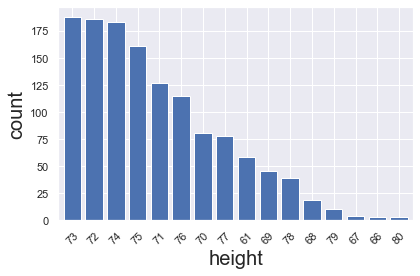

In [269]:
df_dataset_players['height'].value_counts().plot(kind='bar', width=0.80)
plt.xlabel('height', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

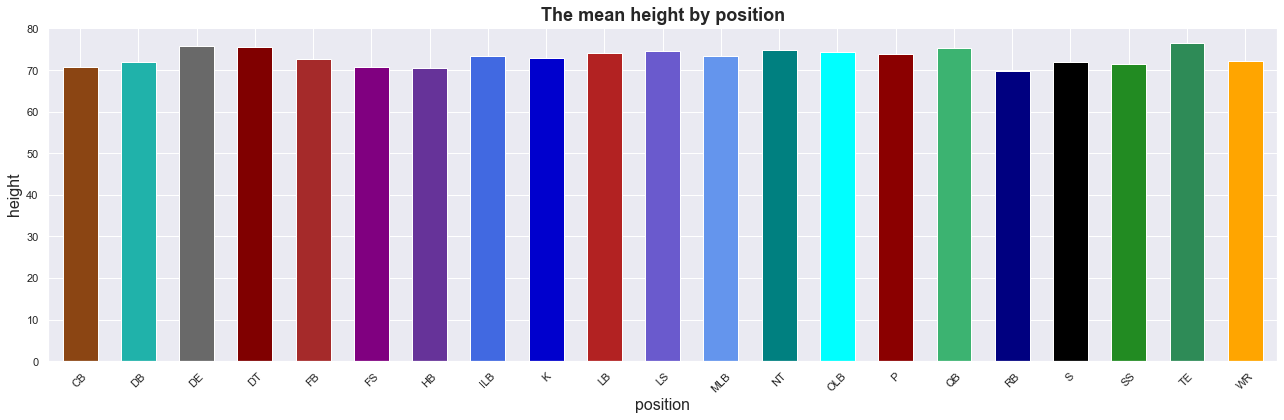

In [270]:
df_dataset_players.groupby('position').height.mean().plot(kind='bar', figsize=(18,6), width = 0.60, color={'navy', 'brown', 'darkred', 'rebeccapurple','mediumblue','firebrick','orange','cornflowerblue','cyan','lightseagreen','forestgreen','dimgrey','black','teal','slateblue','maroon','royalblue','seagreen','mediumseagreen','purple','saddlebrown'})
plt.title('The mean height by position', fontsize=18, fontweight='bold')
plt.xlabel('position', fontsize=16)
plt.ylabel('height', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

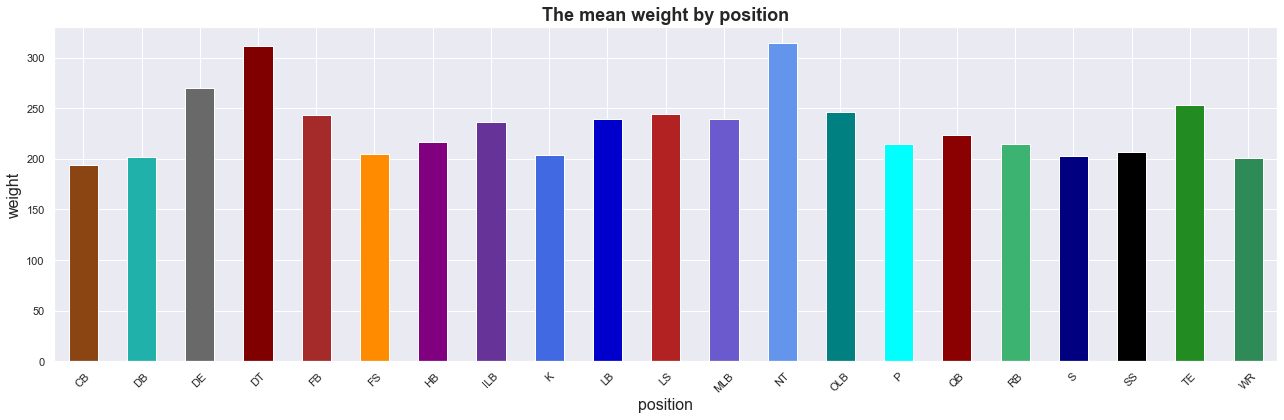

In [271]:
df_dataset_players.groupby('position').weight.mean().plot(kind='bar', figsize=(18,6), color={'navy', 'brown', 'darkred', 'rebeccapurple','mediumblue','firebrick','darkorange','cornflowerblue','cyan','lightseagreen','forestgreen','dimgrey','black','teal','slateblue','maroon','royalblue','seagreen','mediumseagreen','purple','saddlebrown'})
plt.title('The mean weight by position', fontsize=18, fontweight='bold')
plt.xlabel('position',fontsize=16)
plt.ylabel('weight',fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The motion of defensive back may tend to mirror that offensive player that the conerback is covering:

In [272]:
df_dataset_players[df_dataset_players[('displayName')] =='Mitchell Trubisky']

,nflId,height,weight,birthDate,collegeName,position,displayName
474,2558008,74,215,1994-08-20,North Carolina,QB,Mitchell Trubisky


In [273]:
df_dataset_players[df_dataset_players[('displayName')] =='Todd Gurley']

,nflId,height,weight,birthDate,collegeName,position,displayName
571,2552475,73,224,1994-08-03,Georgia,RB,Todd Gurley


This does not mean that patterns of motion of defensive backs in man coverage will follow well-defined trajectories, as is the case for wide receivers.

In [274]:
df_dataset_players[df_dataset_players[('displayName')] =='Taylor Gabriel']

,nflId,height,weight,birthDate,collegeName,position,displayName
472,2550617,67,168,1991-02-17,Abilene Christian,WR,Taylor Gabriel


In [275]:
df_dataset_players[df_dataset_players[('displayName')] =='Cooper Kupp']

,nflId,height,weight,birthDate,collegeName,position,displayName
574,2557898,74,208,1993-06-15,Eastern Washington,WR,Cooper Kupp


In [276]:
df_dataset_players[df_dataset_players[('displayName')] =='Karl Joseph']

,nflId,height,weight,birthDate,collegeName,position,displayName
596,2555342,70,200,1993-09-08,West Virginia,SS,Karl Joseph


In [277]:
df_dataset_players[df_dataset_players[('displayName')] =='Xavien Howard']

,nflId,height,weight,birthDate,collegeName,position,displayName
213,2555539,73,200,1993-07-04,Baylor,CB,Xavien Howard


In [278]:
df_dataset_players[df_dataset_players[('displayName')] =='Marshon Lattimore']

,nflId,height,weight,birthDate,collegeName,position,displayName
288,2558061,72,192,1996-05-20,Ohio State,CB,Marshon Lattimore


In [279]:
df_dataset_players[df_dataset_players[('displayName')] =='Byron Jones']

,nflId,height,weight,birthDate,collegeName,position,displayName
423,2552568,72,205,1992-09-26,Connecticut,CB,Byron Jones


In [280]:
df_dataset_players[df_dataset_players[('displayName')] =='Desmond King']

,nflId,height,weight,birthDate,collegeName,position,displayName
621,2557927,70,201,1994-12-14,Iowa,CB,Desmond King


In [281]:
df_dataset_players[df_dataset_players[('displayName')] =='Darius Slay']

,nflId,height,weight,birthDate,collegeName,position,displayName
531,2540288,72,190,1991-01-01,Mississippi State,CB,Darius Slay


In [282]:
df_dataset_players[df_dataset_players[('displayName')] =='Marlon Humphrey']

,nflId,height,weight,birthDate,collegeName,position,displayName
59,2558067,72,197,1996-07-08,Alabama,CB,Marlon Humphrey


In [283]:
df_dataset_players[df_dataset_players[('displayName')] =='Eric Murray']

,nflId,height,weight,birthDate,collegeName,position,displayName
678,2555173,71,199,1994-01-07,Minnesota,FS,Eric Murray


In [284]:
df_dataset_players[df_dataset_players[('displayName')] =='Jabaal Sheard']

,nflId,height,weight,birthDate,collegeName,position,displayName
1186,2495228,75,268,1989-05-10,Pittsburgh,DE,Jabaal Sheard


In [285]:
df_dataset_players[df_dataset_players[('displayName')] =='Malik Hooker']

,nflId,height,weight,birthDate,collegeName,position,displayName
179,2558060,73,212,1996-04-02,Ohio State,FS,Malik Hooker


In [286]:
df_dataset_players[df_dataset_players[('displayName')] =='Reggie Ragland']

,nflId,height,weight,birthDate,collegeName,position,displayName
677,2555169,74,252,1993-09-23,Alabama,ILB,Reggie Ragland


In [287]:
df_dataset_players[df_dataset_players[('displayName')] =='Eric Berry']

,nflId,height,weight,birthDate,collegeName,position,displayName
1237,496723,72,212,12/29/1988,Tennessee,SS,Eric Berry


In [288]:
df_dataset_players[df_dataset_players[('displayName')] =='Xavier Rhodes']

,nflId,height,weight,birthDate,collegeName,position,displayName
648,2540155,73,218,1990-06-19,Florida State,CB,Xavier Rhodes


In [289]:
df_dataset_players.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

In [290]:
print(df_dataset_players.position.value_counts(ascending=True))

NT       5
HB       5
K        5
S       11
LS      12
P       13
FB      19
DT      28
MLB     29
DB      33
DE      49
ILB     56
SS      58
LB      58
FS      65
QB      71
OLB    100
TE     128
RB     135
CB     195
WR     228
Name: position, dtype: int64


In [291]:
df_dataset_players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [292]:
df_dataset_players.shape

(1303, 7)

In [293]:
df_dataset_plays = pd.read_csv('datasets\plays.csv', sep=',', parse_dates=True)
df_dataset_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [294]:
df_dataset_plays.dtypes

gameId                      int64
playId                      int64
playDescription            object
quarter                     int64
down                        int64
yardsToGo                   int64
possessionTeam             object
playType                   object
yardlineSide               object
yardlineNumber              int64
offenseFormation           object
personnelO                 object
defendersInTheBox         float64
numberOfPassRushers       float64
personnelD                 object
typeDropback               object
preSnapVisitorScore       float64
preSnapHomeScore          float64
gameClock                  object
absoluteYardlineNumber    float64
penaltyCodes               object
penaltyJerseyNumbers       object
passResult                 object
offensePlayResult           int64
playResult                  int64
epa                       float64
isDefensivePI                bool
dtype: object

In [295]:
df_dataset_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [296]:
df_dataset_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [297]:
df_dataset_plays.nunique()

gameId                      253
playId                     4592
playDescription           19235
quarter                       5
down                          4
yardsToGo                    34
possessionTeam               32
playType                      3
yardlineSide                 32
yardlineNumber               50
offenseFormation              7
personnelO                   56
defendersInTheBox            11
numberOfPassRushers          11
personnelD                   56
typeDropback                  7
preSnapVisitorScore          45
preSnapHomeScore             46
gameClock                   901
absoluteYardlineNumber       99
penaltyCodes                 86
penaltyJerseyNumbers        666
passResult                    5
offensePlayResult           104
playResult                  123
epa                       19189
isDefensivePI                 2
dtype: int64

In [298]:
print('Unique values in `state` column:', list(df_dataset_plays.penaltyCodes.unique()))

Unique values in `state` column: [nan, 'RPS', 'ING', 'IBW', 'UNRd', 'UNR', 'OH', 'ILF', 'ILM', 'OPI', 'TAU;TAUd;TAU', 'DOF', 'RPS;UNRd', 'DH', 'ICT', 'TAUd', 'TRP', 'UNSd', 'FMM', 'IDP', 'ITP', 'UOHd', 'DSQ', 'DH;DH', 'ILHd', 'DSQd', 'TAU', 'IBB', 'DOF;RPS', 'DPI', 'DH;UNSd', 'UNRd;ICT', 'FMM;HC', 'DOG', 'HC', 'ISH', 'ILH', 'UNS', 'OH;IBB', 'ICB', 'UNR;UNRd', 'DH;DPI', 'UNRd;DH', 'ICT;UNSd', 'IFP', 'OH;OH', 'DTM', 'UNRd;UNR', 'CHB', 'DSQ;DSQd', 'IBW;ISH', 'UNS;UNSd', 'ILH;OH', 'RPS;DOF', 'UOH', 'IBW;OH', 'TAUd;UNSd', 'DH;OPI', 'ILM;DH', 'DPI;OPI', 'ICT;TAU', 'OH;DH', 'DOF;DPI', 'DPI;FMM', 'OH;RPS', 'ICT;ICT', 'DPI;ILH', 'DH;ING', 'DPI;DH', 'DH;DOF', 'DPI;DOF', 'ICT;OPI', 'DPI;ICT;DH', 'OPI;IDP', 'OPI;DH', 'OPI;OH', 'RPS;UNR', 'DH;OH', 'ICT;DPI', 'DH;ICT', 'OPI;UNS', 'ICT;DH', 'RPS;ICT', 'OH;DH;OH', 'OH;DPI', 'TAUd;DH', 'OPI;ILF']


In [299]:
df_dataset_plays.sample(n=10)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
4906,2018100707,1113,(11:29) (Shotgun) M.Ryan pass short middle to ...,2,1,10,ATL,play_type_pass,PIT,43,...,13.0,11:29:00,53.0,NaN,NaN,C,43,43,3.794551,False
3667,2018093004,336,(9:36) (Shotgun) D.Watson pass short left to K...,1,1,10,HOU,play_type_pass,HOU,44,...,7.0,09:36:00,54.0,NaN,NaN,C,5,5,-0.154606,False
6349,2018101408,2161,(14:54) A.Smith pass incomplete right.,3,1,10,WAS,play_type_pass,WAS,31,...,17.0,14:54:00,79.0,NaN,NaN,I,0,0,-0.538571,False
8991,2018110100,236,(11:15) D.Carr sacked ob at SF 15 for -2 yards...,1,1,10,OAK,play_type_sack,SF,13,...,0.0,11:15:00,97.0,NaN,NaN,S,-2,-2,-0.329388,False
2706,2018092305,1113,(14:04) (Shotgun) J.Garoppolo pass short middl...,2,2,26,SF,play_type_pass,SF,38,...,14.0,14:04:00,72.0,NaN,NaN,C,10,10,-0.188044,False
1744,2018091606,2077,(:30) (Shotgun) N.Foles pass short right to C....,2,1,10,PHI,play_type_pass,TB,39,...,20.0,00:30:00,49.0,NaN,NaN,C,-5,-5,-0.440817,False
6645,2018101409,2516,(9:11) (Shotgun) J.Goff pass incomplete short ...,3,2,10,LA,play_type_pass,LA,42,...,3.0,09:11:00,68.0,NaN,NaN,I,0,0,-0.914301,False
102,2018090901,1021,(15:00) B.Roethlisberger sacked at CLV 47 for ...,2,1,10,PIT,play_type_sack,CLE,43,...,0.0,15:00:00,53.0,NaN,NaN,S,-4,-4,-0.707883,False
4203,2018093008,2673,(5:45) (Shotgun) R.Wilson pass incomplete shor...,3,2,19,SEA,play_type_pass,ARI,23,...,10.0,05:45:00,33.0,NaN,NaN,I,0,0,-0.463983,False
3906,2018093000,3347,(11:24) (Shotgun) A.Dalton pass short right to...,4,2,10,CIN,play_type_pass,ATL,37,...,33.0,11:24:00,47.0,DH,ATL 23,C,16,16,1.188532,False


In [300]:
df_dataset_plays.tail()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True
19238,2018122201,2649,(7:16) (Shotgun) L.Jackson pass incomplete sho...,3,1,10,BAL,play_type_unknown,LAC,49,...,NaN,NaN,NaN,DPI,LAC 43,I,0,9,0.550256,True


In [301]:
df_dataset_plays.isnull().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
playType                      0
yardlineSide                254
yardlineNumber                0
offenseFormation            141
personnelO                   29
defendersInTheBox            62
numberOfPassRushers         633
personnelD                   29
typeDropback                639
preSnapVisitorScore         639
preSnapHomeScore            639
gameClock                   639
absoluteYardlineNumber      639
penaltyCodes              18033
penaltyJerseyNumbers      18033
passResult                    2
offensePlayResult             0
playResult                    0
epa                           0
isDefensivePI                 0
dtype: int64

In [302]:
median_defendersInTheBox = df_dataset_plays['defendersInTheBox'].median() 

In [303]:
print(median_defendersInTheBox)

6.0


In [304]:
df_dataset_plays.update(df_dataset_plays['defendersInTheBox'].fillna(median_defendersInTheBox))

In [305]:
df_dataset_plays['defendersInTheBox'] = df_dataset_plays['defendersInTheBox'].astype(np.int64)

In [306]:
median_numberOfPassRushers  = df_dataset_plays['numberOfPassRushers'].median() 

In [307]:
print(median_numberOfPassRushers)

4.0


In [308]:
df_dataset_plays.update(df_dataset_plays['numberOfPassRushers'].fillna(median_numberOfPassRushers, inplace=True))

In [309]:
df_dataset_plays['numberOfPassRushers'] = df_dataset_plays['numberOfPassRushers'].astype(np.int64)

In [310]:
print('Unique values in `state` column:', list(df_dataset_plays['typeDropback'].unique()))

Unique values in `state` column: ['TRADITIONAL', 'SCRAMBLE_ROLLOUT_LEFT', 'DESIGNED_ROLLOUT_LEFT', 'SCRAMBLE_ROLLOUT_RIGHT', 'DESIGNED_ROLLOUT_RIGHT', 'SCRAMBLE', 'UNKNOWN', nan]


In [311]:
median_preSnapVisitorScore  = df_dataset_plays['preSnapVisitorScore'].median() 

In [312]:
df_dataset_plays.update(df_dataset_plays['preSnapVisitorScore'].fillna(median_preSnapVisitorScore, inplace=True))

In [313]:
print('Unique values in `state` column:', list(df_dataset_plays['preSnapVisitorScore'].unique()))

Unique values in `state` column: [0.0, 3.0, 6.0, 12.0, 7.0, 14.0, 21.0, 10.0, 17.0, 24.0, 27.0, 34.0, 13.0, 20.0, 9.0, 31.0, 41.0, 48.0, 8.0, 23.0, 38.0, 26.0, 33.0, 29.0, 18.0, 28.0, 35.0, 42.0, 19.0, 16.0, 30.0, 37.0, 22.0, 40.0, 45.0, 5.0, 32.0, 2.0, 15.0, 25.0, 39.0, 51.0, 44.0, 11.0, 36.0]


In [314]:
median_preSnapHomeScore = df_dataset_plays['preSnapHomeScore'].median() 

In [315]:
df_dataset_plays.update(df_dataset_plays['preSnapHomeScore'].fillna(median_preSnapHomeScore, inplace=True))

In [316]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(
    missing_values=np.nan,  
    strategy='constant',  
    fill_value=0, 
    verbose=0,
    copy=True
)

In [317]:
si.fit(X=df_dataset_plays)

df_dataset_plays = pd.DataFrame.from_records(
    data=si.transform(
        X=df_dataset_plays
    ),  
    columns=df_dataset_plays.columns  
)

In [318]:
df_dataset_plays.isnull().sum()

gameId                    0
playId                    0
playDescription           0
quarter                   0
down                      0
yardsToGo                 0
possessionTeam            0
playType                  0
yardlineSide              0
yardlineNumber            0
offenseFormation          0
personnelO                0
defendersInTheBox         0
numberOfPassRushers       0
personnelD                0
typeDropback              0
preSnapVisitorScore       0
preSnapHomeScore          0
gameClock                 0
absoluteYardlineNumber    0
penaltyCodes              0
penaltyJerseyNumbers      0
passResult                0
offensePlayResult         0
playResult                0
epa                       0
isDefensivePI             0
dtype: int64

In [319]:
df_dataset_plays[df_dataset_plays[('passResult')] =='R']

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18886,2018102808,544,(4:49) (Shotgun) A.Luck scrambles left end ran...,1,3,5,IND,play_type_unknown,IND,45,...,10.0,0,0.0,DH;OH,OAK 99;IND 78,R,18,0,-0.003994,False
18925,2018110410,2201,(1:15) (Shotgun) A.Rodgers scrambles right tac...,2,2,10,GB,play_type_unknown,GB,36,...,10.0,0,0.0,OH;DH,GB 74;NE 91,R,5,0,-0.034272,False
18971,2018111806,4056,(2:00) (Shotgun) D.Watson scrambles up the mid...,4,3,5,HOU,play_type_unknown,WAS,37,...,10.0,0,0.0,DH,WAS 24,R,2,5,0.870164,False
19061,2018120211,4034,(1:46) (Shotgun) M.Mariota scrambles right end...,4,1,10,TEN,play_type_unknown,TEN,14,...,10.0,0,0.0,OH;DH,TEN 78;NYJ 21,R,11,0,-0.002844,False


In [320]:
df_dataset_plays.drop(18886, inplace=True)

In [321]:
df_dataset_plays.drop(18925, inplace=True)

In [322]:
df_dataset_plays.drop(18971, inplace=True)

In [323]:
df_dataset_plays.drop(19061, inplace=True)

In [324]:
df_dataset_plays[df_dataset_plays[('passResult')] == 0]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18777,2018100706,690,(3:08) R.Freeman up the middle to DEN 20 for n...,1,1,10,DEN,play_type_unknown,DEN,20,...,10.0,0,0.0,DH,NYJ 99,0,0,5,0.443308,False
18855,2018102109,2662,(9:07) (Shotgun) D.Johnson left guard to CLV 2...,3,1,10,CLE,play_type_unknown,CLE,29,...,10.0,0,0.0,DH,TB 56,0,-2,5,0.317013,False


In [325]:
df_dataset_plays.drop(18777, inplace=True)

In [326]:
df_dataset_plays.drop(18855, inplace=True)

In [327]:
df_dataset_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,0,0,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,0,0,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,0,0,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,0,0,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,0,0,I,0,0,-0.842272,False


In [328]:
df_dataset_plays['gameClock'] = pd.DatetimeIndex(df_dataset_plays['gameClock'])

In [329]:
df_dataset_plays['gameClock'] = pd.to_datetime(df_dataset_plays['gameClock'], format='%H:%M:%S', infer_datetime_format=True).dt.strftime('%H:%M:%S')

In [330]:
df_dataset_plays.dtypes

gameId                      int64
playId                      int64
playDescription            object
quarter                     int64
down                        int64
yardsToGo                   int64
possessionTeam             object
playType                   object
yardlineSide               object
yardlineNumber              int64
offenseFormation           object
personnelO                 object
defendersInTheBox           int64
numberOfPassRushers         int64
personnelD                 object
typeDropback               object
preSnapVisitorScore       float64
preSnapHomeScore          float64
gameClock                  object
absoluteYardlineNumber    float64
penaltyCodes               object
penaltyJerseyNumbers       object
passResult                 object
offensePlayResult           int64
playResult                  int64
epa                       float64
isDefensivePI                bool
dtype: object

In [331]:
df_dataset_plays.sample(n=10)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
16608,2018122309,4286,(3:24) (Shotgun) S.Darnold pass incomplete sho...,4,3,19,NYJ,play_type_pass,NYJ,41,...,35.0,03:24:00,51.0,0,0,I,0,0,-1.298431,False
9128,2018110402,947,(1:01) R.Fitzpatrick pass short left to A.Hump...,1,2,7,TB,play_type_pass,CAR,22,...,14.0,01:01:00,88.0,0,0,C,5,5,-0.081497,False
10260,2018111103,2481,(11:07) A.Rodgers pass short left to M.Lewis t...,3,3,2,GB,play_type_pass,GB,48,...,14.0,11:07:00,58.0,0,0,C,30,30,3.088931,False
13462,2018120202,3218,(:47) (Shotgun) J.Goff pass short right to T.G...,3,2,8,LA,play_type_pass,LA,39,...,13.0,00:47:00,71.0,0,0,C,9,9,1.107533,False
12634,2018112506,3677,(5:56) (Shotgun) E.Manning pass incomplete sho...,4,3,4,NYG,play_type_pass,PHI,11,...,22.0,05:56:00,99.0,0,0,I,0,0,-0.958756,False
11368,2018111805,352,(8:50) (No Huddle) R.Fitzpatrick pass short le...,1,1,10,TB,play_type_pass,NYG,26,...,7.0,08:50:00,36.0,0,0,C,3,3,-0.060688,False
17236,2018122313,3122,(3:21) (Shotgun) D.Brees sacked at NO 23 for -...,3,3,16,NO,play_type_sack,NO,30,...,24.0,03:21:00,80.0,0,0,S,-7,-7,-2.139594,False
8419,2018102803,1462,(8:45) (Shotgun) J.Winston pass short right to...,2,3,5,TB,play_type_pass,TB,30,...,14.0,08:45:00,40.0,0,0,C,9,9,1.839921,False
15733,2018121601,2256,(14:11) (Shotgun) L.Jackson pass short middle ...,3,3,7,BAL,play_type_pass,BAL,25,...,10.0,14:11:00,85.0,0,0,C,17,17,2.576807,False
15881,2018121605,3248,(15:00) (Shotgun) D.Prescott pass incomplete s...,4,4,1,DAL,play_type_pass,IND,39,...,20.0,15:00:00,71.0,0,0,I,0,0,-2.722758,False


In [332]:
df_dataset_plays.tail()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,10.0,00:00:00,0.0,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,10.0,00:00:00,0.0,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,10.0,00:00:00,0.0,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,10.0,00:00:00,0.0,DPI,BAL 23,I,0,15,1.336078,True
19238,2018122201,2649,(7:16) (Shotgun) L.Jackson pass incomplete sho...,3,1,10,BAL,play_type_unknown,LAC,49,...,10.0,00:00:00,0.0,DPI,LAC 43,I,0,9,0.550256,True


# The analyze data of game between the Jacksonville Jaguars and the New York Giants 

In [333]:
df_dataset_plays[(df_dataset_plays['gameId'] == 2018090907) & (df_dataset_plays['possessionTeam'] == 'NYG')]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
486,2018090907,498,(7:55) E.Manning pass short right to R.Ellison...,1,3,23,NYG,play_type_pass,NYG,1,...,0.0,07:55:00,11.0,0,0,C,16,16,-0.043213,False
490,2018090907,641,(5:05) (Shotgun) E.Manning pass deep left to O...,1,1,10,NYG,play_type_pass,NYG,47,...,0.0,05:05:00,57.0,0,0,C,24,24,1.381302,False
491,2018090907,686,(3:32) (Shotgun) E.Manning pass short left to ...,1,2,5,NYG,play_type_pass,JAX,24,...,0.0,03:32:00,86.0,0,0,C,3,3,-0.255913,False
492,2018090907,710,(3:15) (No Huddle) E.Manning pass short right ...,1,3,2,NYG,play_type_pass,JAX,21,...,0.0,03:15:00,89.0,0,0,C,13,13,1.562097,False
500,2018090907,1268,(7:12) (Shotgun) E.Manning pass short left to ...,2,1,20,NYG,play_type_pass,NYG,15,...,3.0,07:12:00,95.0,0,0,C,-1,-1,-0.557140,False
501,2018090907,1292,(6:32) (Shotgun) E.Manning pass short middle t...,2,2,21,NYG,play_type_pass,NYG,14,...,3.0,06:32:00,96.0,0,0,C,5,5,-0.292925,False
502,2018090907,1316,(5:50) (Shotgun) E.Manning pass short left to ...,2,3,16,NYG,play_type_pass,NYG,19,...,3.0,05:50:00,91.0,0,0,C,7,7,-0.904488,False
506,2018090907,1537,"(2:18) (No Huddle, Shotgun) E.Manning pass sho...",2,2,11,NYG,play_type_pass,NYG,24,...,10.0,00:00:00,0.0,0,0,C,12,12,0.695220,False
507,2018090907,1578,(2:00) (Shotgun) E.Manning sacked at NYG 29 fo...,2,1,10,NYG,play_type_sack,NYG,36,...,3.0,02:00:00,74.0,0,0,S,-7,-7,-0.557187,False
508,2018090907,1597,"(1:33) (No Huddle, Shotgun) E.Manning pass sho...",2,2,17,NYG,play_type_pass,NYG,29,...,3.0,01:33:00,81.0,0,0,C,5,5,-0.262902,False


In [334]:
df_dataset1_plays = df_dataset_plays[(df_dataset_plays['gameId'] == 2018090907) & (df_dataset_plays['possessionTeam'] == 'NYG')]

In [335]:
pd.crosstab(index=df_dataset1_plays.penaltyCodes, columns=df_dataset1_plays.penaltyJerseyNumbers)

penaltyJerseyNumbers,0,JAX 20,JAX 39,JAX 42,NYG 88
penaltyCodes,,,,,
0,39,0,0,0,0
DH,0,0,1,0,0
DPI,0,1,0,1,0
OPI,0,0,0,0,1


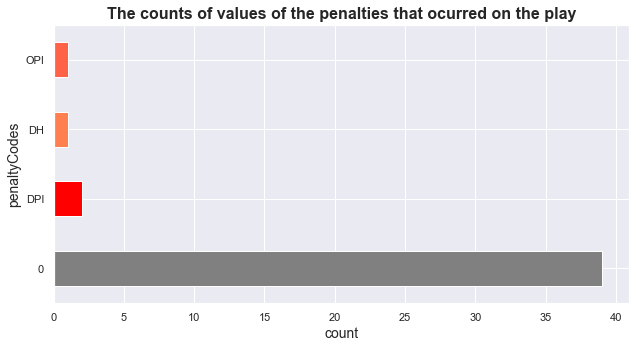

In [336]:
df_dataset1_plays['penaltyCodes'].value_counts().plot(kind='barh', color=['gray','red','coral','tomato'], figsize=(9,5))
plt.title('The counts of values of the penalties that ocurred on the play', fontsize=16,fontweight='bold')
plt.xlabel('count', fontsize=14)
plt.ylabel('penaltyCodes', fontsize=14)
plt.tight_layout()

In [337]:
math.floor(df_dataset1_plays['preSnapHomeScore'].agg(np.mean))

7

In [338]:
math.floor(df_dataset1_plays['preSnapVisitorScore'].agg(np.mean))

12

# LOS ANGELES RAMS vs OAKLAND RAIDERS 

In [339]:
df_dataset_plays[
    (df_dataset_plays['gameId'] == 2018091001) & (df_dataset_plays['possessionTeam'] == 'OAK')
]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
916,2018091001,124,(13:25) (Shotgun) D.Carr pass short middle to ...,1,1,10,OAK,play_type_pass,OAK,35,...,0.0,13:25:00,45.0,0,0,C,45,45,2.638069,False
917,2018091001,235,(10:58) (Shotgun) D.Carr pass short left to M....,1,1,12,OAK,play_type_pass,LA,12,...,0.0,10:58:00,98.0,0,0,C,2,2,-0.029400,False
919,2018091001,451,(7:38) (Shotgun) D.Carr pass short right to D....,1,2,20,OAK,play_type_pass,OAK,5,...,7.0,07:38:00,15.0,0,0,C,-1,-1,-0.785829,False
920,2018091001,475,(6:54) (Shotgun) D.Carr pass short left to J.N...,1,3,21,OAK,play_type_pass,OAK,4,...,7.0,06:54:00,14.0,0,0,C,3,3,-0.900350,False
925,2018091001,694,(4:34) (Shotgun) D.Carr pass short right to D....,1,1,20,OAK,play_type_pass,OAK,15,...,7.0,04:34:00,25.0,0,0,C,12,12,0.582664,False
926,2018091001,792,(2:31) (Shotgun) D.Carr pass incomplete short ...,1,2,7,OAK,play_type_pass,OAK,40,...,7.0,02:31:00,50.0,0,0,I,0,0,-0.915018,False
927,2018091001,820,(2:27) (Shotgun) D.Carr pass short middle to J...,1,3,7,OAK,play_type_pass,OAK,40,...,7.0,02:27:00,50.0,0,0,C,11,11,2.153672,False
928,2018091001,915,(1:10) (Shotgun) D.Carr pass short right to M....,1,2,16,OAK,play_type_pass,OAK,45,...,7.0,01:10:00,55.0,0,0,C,6,6,-0.440522,False
929,2018091001,939,(:34) (Shotgun) D.Carr pass short left to S.Ro...,1,3,10,OAK,play_type_pass,LA,49,...,7.0,00:34:00,61.0,0,0,C,11,11,2.019403,False
930,2018091001,980,(15:00) D.Carr pass deep right to J.Cook pushe...,2,1,10,OAK,play_type_pass,LA,38,...,7.0,15:00:00,48.0,ICT,LA 21,C,28,28,1.693436,False


In [340]:
df_dataset2_plays = df_dataset_plays[(df_dataset_plays['gameId'] == 2018091001) & (df_dataset_plays['possessionTeam'] == 'OAK')]

In [341]:
#calculate the frequency of values 
df_dataset2_plays.groupby(['personnelD'])['down'].count()

personnelD
2 DL, 3 LB, 6 DB    11
3 DL, 2 LB, 6 DB    15
3 DL, 3 LB, 5 DB     5
3 DL, 4 LB, 4 DB     8
4 DL, 1 LB, 6 DB     2
4 DL, 3 LB, 4 DB     1
Name: down, dtype: int64

In [342]:
df_dataset2_plays.groupby('personnelD').first()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
personnelD,,,,,,,,,,,,,,,,,,,,,
"2 DL, 3 LB, 6 DB",2018091001,1946,(1:23) (Shotgun) D.Carr pass short middle to J...,2,2,20,OAK,play_type_pass,OAK,40,...,10.0,01:23:00,70.0,0,0,C,7,7,-0.211258,False
"3 DL, 2 LB, 6 DB",2018091001,915,(1:10) (Shotgun) D.Carr pass short right to M....,1,2,16,OAK,play_type_pass,OAK,45,...,7.0,01:10:00,55.0,0,0,C,6,6,-0.440522,False
"3 DL, 3 LB, 5 DB",2018091001,451,(7:38) (Shotgun) D.Carr pass short right to D....,1,2,20,OAK,play_type_pass,OAK,5,...,7.0,07:38:00,15.0,0,0,C,-1,-1,-0.785829,False
"3 DL, 4 LB, 4 DB",2018091001,124,(13:25) (Shotgun) D.Carr pass short middle to ...,1,1,10,OAK,play_type_pass,OAK,35,...,0.0,13:25:00,45.0,0,0,C,45,45,2.638069,False
"4 DL, 1 LB, 6 DB",2018091001,235,(10:58) (Shotgun) D.Carr pass short left to M....,1,1,12,OAK,play_type_pass,LA,12,...,0.0,10:58:00,98.0,0,0,C,2,2,-0.029400,False
"4 DL, 3 LB, 4 DB",2018091001,1441,(6:35) D.Carr pass short right to D.Martin to ...,2,1,10,OAK,play_type_pass,LA,32,...,10.0,06:35:00,42.0,0,0,C,-2,-2,-0.395317,False


In [343]:
df_dataset2_plays.groupby('personnelD').last()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
personnelD,,,,,,,,,,,,,,,,,,,,,
"2 DL, 3 LB, 6 DB",2018091001,4147,"(:17) (No Huddle, Shotgun) D.Carr pass short r...",4,1,10,OAK,play_type_pass,LA,39,...,13.0,00:17:00,49.0,0,0,C,8,8,0.371390,False
"3 DL, 2 LB, 6 DB",2018091001,4192,(:13) (Shotgun) D.Carr pass short right to J.R...,4,2,2,OAK,play_type_pass,LA,31,...,13.0,00:13:00,41.0,0,0,C,8,8,-2.418280,False
"3 DL, 3 LB, 5 DB",2018091001,741,(3:37) (Shotgun) D.Carr sacked at OAK 15 for -...,1,2,13,OAK,play_type_unknown,OAK,22,...,10.0,00:00:00,0.0,RPS,LA 99,S,-7,15,1.595181,False
"3 DL, 4 LB, 4 DB",2018091001,2821,(2:31) (Shotgun) D.Carr sacked at OAK 13 for -...,3,3,2,OAK,play_type_sack,OAK,16,...,13.0,02:31:00,26.0,0,0,S,-3,-3,-1.641110,False
"4 DL, 1 LB, 6 DB",2018091001,820,(2:27) (Shotgun) D.Carr pass short middle to J...,1,3,7,OAK,play_type_pass,OAK,40,...,7.0,02:27:00,50.0,0,0,C,11,11,2.153672,False
"4 DL, 3 LB, 4 DB",2018091001,1441,(6:35) D.Carr pass short right to D.Martin to ...,2,1,10,OAK,play_type_pass,LA,32,...,10.0,06:35:00,42.0,0,0,C,-2,-2,-0.395317,False


# The matchup between the best offense Kansas City Chiefs against the best defense Jacksonville Jaguars

In [344]:
df_dataset3_plays = df_dataset_plays[(df_dataset_plays['gameId'] == 2018100705)]

In [345]:
df_dataset3_plays.head(n=10)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
5045,2018100705,102,(13:34) (Shotgun) B.Bortles pass short middle ...,1,3,3,JAX,play_type_pass,JAX,27,...,0.0,13:34:00,83.0,0,0,C,6,6,1.868004,False
5046,2018100705,126,(12:58) (Shotgun) B.Bortles pass incomplete sh...,1,1,10,JAX,play_type_pass,JAX,33,...,0.0,12:58:00,77.0,0,0,I,0,0,-0.535078,False
5047,2018100705,169,(12:13) (Shotgun) B.Bortles pass incomplete sh...,1,3,10,JAX,play_type_pass,JAX,33,...,0.0,12:13:00,77.0,0,0,I,0,0,-1.699804,False
5048,2018100705,271,(10:49) (Shotgun) P.Mahomes pass short right t...,1,2,8,KC,play_type_pass,KC,40,...,0.0,10:49:00,50.0,0,0,C,2,2,-0.782662,False
5049,2018100705,323,(9:49) P.Mahomes pass short right to A.Sherman...,1,3,1,KC,play_type_pass,KC,47,...,0.0,09:49:00,57.0,0,0,C,15,15,2.323458,False
5050,2018100705,347,(9:05) P.Mahomes pass short right to D.Harris ...,1,1,10,KC,play_type_pass,JAX,38,...,0.0,09:05:00,72.0,0,0,C,5,5,-0.051140,False
5051,2018100705,371,(8:23) (Shotgun) P.Mahomes pass short right to...,1,2,5,KC,play_type_pass,JAX,33,...,0.0,08:23:00,77.0,0,0,C,7,7,0.666882,False
5052,2018100705,395,(7:45) (Shotgun) P.Mahomes pass incomplete sho...,1,1,10,KC,play_type_pass,JAX,26,...,0.0,07:45:00,84.0,0,0,I,0,0,-0.249065,False
5053,2018100705,417,(7:40) (Shotgun) P.Mahomes pass short middle t...,1,2,10,KC,play_type_pass,JAX,26,...,0.0,07:40:00,84.0,0,0,C,15,15,1.208851,False
5054,2018100705,449,(6:58) (Shotgun) P.Mahomes pass short middle t...,1,1,10,KC,play_type_pass,JAX,11,...,0.0,06:58:00,99.0,UNRd,JAX 42,C,2,7,0.477523,False


In [346]:
#Frequency Count
pd.crosstab(index=df_dataset3_plays.offenseFormation, columns=df_dataset3_plays.personnelD)

personnelD,"3 DL, 3 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 3 LB, 4 DB"
offenseFormation,,,
EMPTY,1,11,0
I_FORM,0,1,3
SHOTGUN,51,31,1
SINGLEBACK,1,3,2


In [347]:
pd.crosstab(index=df_dataset3_plays.possessionTeam, columns=df_dataset3_plays.personnelD)

personnelD,"3 DL, 3 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 3 LB, 4 DB"
possessionTeam,,,
JAX,51,10,5
KC,2,36,1


In [348]:
df_dataset3_plays['possessionTeam'].value_counts(ascending=True).to_frame()

,possessionTeam
KC,39
JAX,66


In [349]:
math.floor(df_dataset3_plays['offensePlayResult'].agg(np.mean))

6

In [350]:
#The Kansas City Chiefs team ofensive line net yards gained by the offense, including penalty yardage
#The minimum of net yards gained by offensive was fifteen with personnel defensive team used 4DL, 3LB, 4DB  
df_dataset3_plays[
    (df_dataset3_plays['gameId'] == 2018100705) & (df_dataset3_plays['possessionTeam'] == 'KC')
                ].groupby(['possessionTeam','personnelD'])['playResult'].sum()

possessionTeam  personnelD      
KC              3 DL, 3 LB, 5 DB     61
                4 DL, 2 LB, 5 DB    242
                4 DL, 3 LB, 4 DB     15
Name: playResult, dtype: int64

In [351]:
df_dataset3_plays[
    (df_dataset3_plays['gameId'] == 2018100705) & (df_dataset3_plays['possessionTeam'] == 'KC')]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
5048,2018100705,271,(10:49) (Shotgun) P.Mahomes pass short right t...,1,2,8,KC,play_type_pass,KC,40,...,0.0,10:49:00,50.0,0,0,C,2,2,-0.782662,False
5049,2018100705,323,(9:49) P.Mahomes pass short right to A.Sherman...,1,3,1,KC,play_type_pass,KC,47,...,0.0,09:49:00,57.0,0,0,C,15,15,2.323458,False
5050,2018100705,347,(9:05) P.Mahomes pass short right to D.Harris ...,1,1,10,KC,play_type_pass,JAX,38,...,0.0,09:05:00,72.0,0,0,C,5,5,-0.051140,False
5051,2018100705,371,(8:23) (Shotgun) P.Mahomes pass short right to...,1,2,5,KC,play_type_pass,JAX,33,...,0.0,08:23:00,77.0,0,0,C,7,7,0.666882,False
5052,2018100705,395,(7:45) (Shotgun) P.Mahomes pass incomplete sho...,1,1,10,KC,play_type_pass,JAX,26,...,0.0,07:45:00,84.0,0,0,I,0,0,-0.249065,False
5053,2018100705,417,(7:40) (Shotgun) P.Mahomes pass short middle t...,1,2,10,KC,play_type_pass,JAX,26,...,0.0,07:40:00,84.0,0,0,C,15,15,1.208851,False
5054,2018100705,449,(6:58) (Shotgun) P.Mahomes pass short middle t...,1,1,10,KC,play_type_pass,JAX,11,...,0.0,06:58:00,99.0,UNRd,JAX 42,C,2,7,0.477523,False
5059,2018100705,724,(3:44) (Shotgun) P.Mahomes pass short left to ...,1,2,4,KC,play_type_pass,KC,20,...,7.0,03:44:00,30.0,0,0,C,9,9,1.284589,False
5060,2018100705,748,(3:03) (Shotgun) P.Mahomes pass incomplete dee...,1,1,10,KC,play_type_pass,KC,29,...,7.0,03:03:00,39.0,0,0,I,0,0,-0.546838,False
5061,2018100705,791,(2:16) (Shotgun) P.Mahomes pass short left to ...,1,3,8,KC,play_type_pass,KC,31,...,7.0,02:16:00,41.0,0,0,C,13,13,2.268649,False


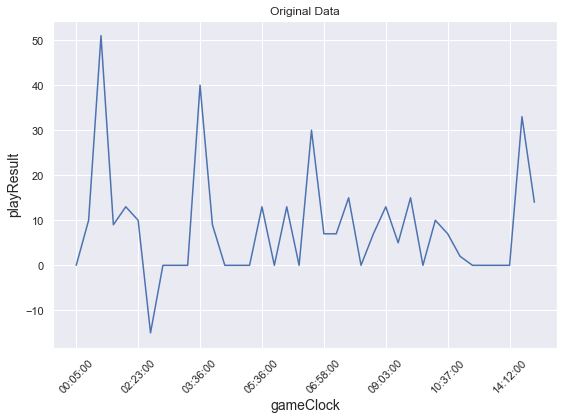

In [352]:
df_dataset3_plays[
    (df_dataset3_plays['gameId'] == 2018100705) & (df_dataset3_plays['possessionTeam'] == 'KC')
                ].groupby('gameClock')['playResult'].sum().plot(kind='line',figsize=(8,6))
sns.set(style='darkgrid')
plt.ylabel('playResult', fontsize=14)
plt.xlabel('gameClock', fontsize=14)
plt.xticks(rotation=45)
plt.title('Original Data')
plt.tight_layout()
plt.show()

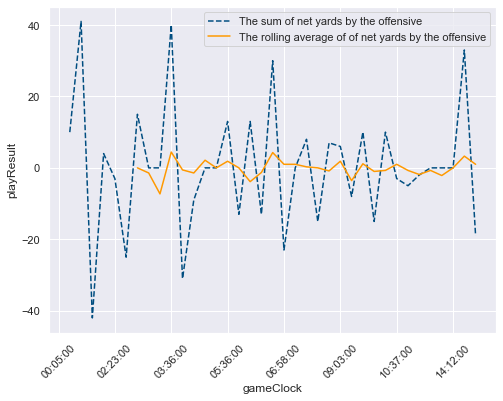

In [353]:
ax = df_dataset3_plays[
    (df_dataset3_plays['gameId'] == 2018100705) & (df_dataset3_plays['possessionTeam'] == 'KC')
                ].groupby('gameClock')['playResult'].sum().diff(periods=1).plot(
 kind='line', grid=True, color='#004d80', style='--', label='The sum of net yards by the offensive', figsize=(8,6)
)
ax = df_dataset3_plays[
    (df_dataset3_plays['gameId'] == 2018100705) & (df_dataset3_plays['possessionTeam'] == 'KC')
                ].groupby('gameClock')['playResult'].sum().diff(periods=1).rolling(window=7).mean().plot(
  kind='line', grid=True, color='#ff9900', style='-', label='The rolling average of of net yards by the offensive', figsize=(8,6), ax=ax
)
ax.set_ylabel('playResult')
_ = ax.legend()
_ = ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=45)

In [354]:
df_dataset3_plays[
    (df_dataset3_plays['gameId'] == 2018100705) & (df_dataset3_plays['possessionTeam'] == 'KC')]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
5048,2018100705,271,(10:49) (Shotgun) P.Mahomes pass short right t...,1,2,8,KC,play_type_pass,KC,40,...,0.0,10:49:00,50.0,0,0,C,2,2,-0.782662,False
5049,2018100705,323,(9:49) P.Mahomes pass short right to A.Sherman...,1,3,1,KC,play_type_pass,KC,47,...,0.0,09:49:00,57.0,0,0,C,15,15,2.323458,False
5050,2018100705,347,(9:05) P.Mahomes pass short right to D.Harris ...,1,1,10,KC,play_type_pass,JAX,38,...,0.0,09:05:00,72.0,0,0,C,5,5,-0.051140,False
5051,2018100705,371,(8:23) (Shotgun) P.Mahomes pass short right to...,1,2,5,KC,play_type_pass,JAX,33,...,0.0,08:23:00,77.0,0,0,C,7,7,0.666882,False
5052,2018100705,395,(7:45) (Shotgun) P.Mahomes pass incomplete sho...,1,1,10,KC,play_type_pass,JAX,26,...,0.0,07:45:00,84.0,0,0,I,0,0,-0.249065,False
5053,2018100705,417,(7:40) (Shotgun) P.Mahomes pass short middle t...,1,2,10,KC,play_type_pass,JAX,26,...,0.0,07:40:00,84.0,0,0,C,15,15,1.208851,False
5054,2018100705,449,(6:58) (Shotgun) P.Mahomes pass short middle t...,1,1,10,KC,play_type_pass,JAX,11,...,0.0,06:58:00,99.0,UNRd,JAX 42,C,2,7,0.477523,False
5059,2018100705,724,(3:44) (Shotgun) P.Mahomes pass short left to ...,1,2,4,KC,play_type_pass,KC,20,...,7.0,03:44:00,30.0,0,0,C,9,9,1.284589,False
5060,2018100705,748,(3:03) (Shotgun) P.Mahomes pass incomplete dee...,1,1,10,KC,play_type_pass,KC,29,...,7.0,03:03:00,39.0,0,0,I,0,0,-0.546838,False
5061,2018100705,791,(2:16) (Shotgun) P.Mahomes pass short left to ...,1,3,8,KC,play_type_pass,KC,31,...,7.0,02:16:00,41.0,0,0,C,13,13,2.268649,False


# The analyze data of game between the Minnesota Vikings and the Los Angeles Rams 

In [355]:
df_dataset_plays[df_dataset_plays[('gameId')]==2018092700]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
3428,2018092700,112,(13:46) (Shotgun) K.Cousins pass short right t...,1,3,7,MIN,play_type_pass,MIN,28,...,0.0,13:46:00,38.0,0,0,C,8,8,1.975145,False
3429,2018092700,146,(13:11) K.Cousins pass short left to C.Ham to ...,1,1,10,MIN,play_type_pass,MIN,36,...,0.0,13:11:00,46.0,0,0,C,6,6,-0.142265,False
3430,2018092700,170,(12:18) K.Cousins pass short right to A.Thiele...,1,2,4,MIN,play_type_pass,MIN,42,...,0.0,12:18:00,52.0,0,0,C,16,16,1.538483,False
3431,2018092700,215,(10:56) (Shotgun) K.Cousins pass short left to...,1,2,13,MIN,play_type_pass,LA,45,...,0.0,10:56:00,65.0,0,0,C,19,19,1.462342,False
3432,2018092700,260,(9:32) K.Cousins pass incomplete short right t...,1,2,3,MIN,play_type_pass,LA,19,...,0.0,09:32:00,91.0,0,0,I,0,0,-0.436226,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,2018092700,4089,(2:20) (Shotgun) K.Cousins sacked at MIN 26 fo...,4,1,10,MIN,play_type_sack,MIN,34,...,38.0,02:20:00,44.0,0,0,S,-8,-8,-0.621986,False
3514,2018092700,4136,(2:00) (Shotgun) K.Cousins pass short left to ...,4,2,18,MIN,play_type_pass,MIN,26,...,38.0,02:00:00,36.0,0,0,C,9,9,-0.153026,False
3515,2018092700,4170,(1:54) (Shotgun) K.Cousins pass short middle t...,4,3,9,MIN,play_type_pass,MIN,35,...,38.0,01:54:00,45.0,0,0,C,13,13,1.067217,False
3516,2018092700,4194,"(1:29) (No Huddle, Shotgun) K.Cousins sacked a...",4,1,10,MIN,play_type_sack,MIN,48,...,38.0,01:29:00,58.0,0,0,S,-4,-4,-4.221298,False


In [356]:
df_dataset4_plays = df_dataset_plays[df_dataset_plays[('gameId')]==2018092700]

In [357]:
df_dataset4_plays[
    (df_dataset4_plays['gameId'] == 2018092700) & (df_dataset4_plays['possessionTeam'] == 'LA')
]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
3436,2018092700,416,(7:55) J.Goff pass incomplete short right.,1,1,10,LA,play_type_pass,LA,25,...,0.0,07:55:00,85.0,0,0,I,0,0,-0.553947,False
3437,2018092700,459,(7:01) (Shotgun) J.Goff pass short right to B....,1,3,8,LA,play_type_pass,LA,27,...,0.0,07:01:00,83.0,0,0,C,9,9,2.056307,False
3438,2018092700,483,(6:29) (No Huddle) J.Goff pass short right to ...,1,1,10,LA,play_type_pass,LA,36,...,0.0,06:29:00,74.0,0,0,C,10,10,0.635911,False
3439,2018092700,512,(5:48) J.Goff pass short left to T.Gurley to M...,1,1,10,LA,play_type_pass,LA,46,...,0.0,05:48:00,64.0,0,0,C,6,6,-0.072330,False
3440,2018092700,536,(5:04) (Shotgun) J.Goff pass incomplete short ...,1,2,4,LA,play_type_pass,MIN,48,...,0.0,05:04:00,58.0,0,0,I,0,0,-0.853020,False
3441,2018092700,612,(4:28) (No Huddle) J.Goff pass short left to G...,1,2,2,LA,play_type_pass,MIN,35,...,0.0,04:28:00,45.0,0,0,C,13,13,1.019952,False
3442,2018092700,646,(3:46) (Shotgun) J.Goff pass short right to C....,1,1,10,LA,play_type_pass,MIN,22,...,0.0,03:46:00,32.0,0,0,C,8,8,0.334366,False
3443,2018092700,696,(2:42) (Shotgun) J.Goff pass short middle to T...,1,1,10,LA,play_type_pass,MIN,11,...,0.0,02:42:00,21.0,0,0,C,3,3,0.048879,False
3444,2018092700,725,(2:01) (Shotgun) J.Goff pass short left to T.G...,1,2,7,LA,play_type_pass,MIN,8,...,0.0,02:01:00,18.0,0,0,C,8,8,1.850798,False
3452,2018092700,1148,(9:40) (No Huddle) J.Goff pass deep right to C...,2,2,5,LA,play_type_pass,LA,30,...,7.0,09:40:00,40.0,0,0,C,70,70,5.896783,False


In [358]:
pd.crosstab(index=df_dataset4_plays.penaltyCodes, columns=df_dataset4_plays.penaltyJerseyNumbers)

penaltyJerseyNumbers,0,LA 37,LA 93,MIN 20,MIN 29,MIN 29;MIN 29
penaltyCodes,,,,,,
0,85,0,0,0,0,0
DH,0,0,1,1,1,0
DH;UNSd,0,0,0,0,0,1
DPI,0,1,0,0,0,0


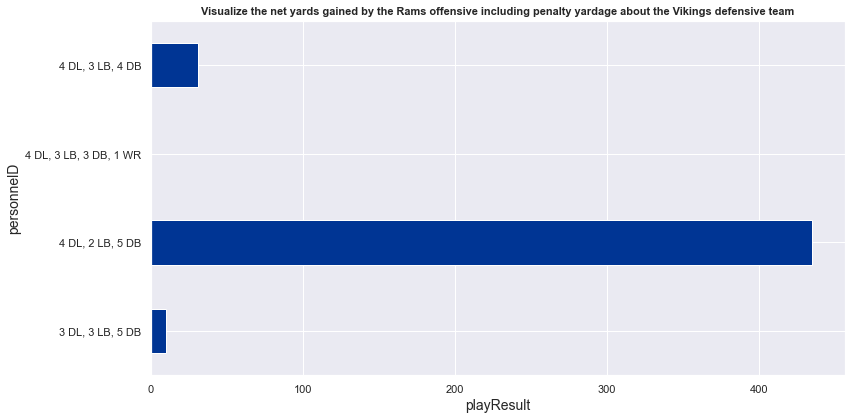

In [359]:
df_dataset4_plays[
    df_dataset4_plays['possessionTeam'] == 'LA'
].groupby('personnelD')['playResult'].sum().plot(kind='barh', figsize=(12,6), color='#003594')

plt.title('Visualize the net yards gained by the Rams offensive including penalty yardage about the Vikings defensive team', fontsize=11, fontweight='bold')
sns.set(style='darkgrid')
plt.ylabel('personnelD', fontsize=14)
plt.xlabel('playResult', fontsize=14)
plt.gca()
plt.tight_layout()
plt.show()

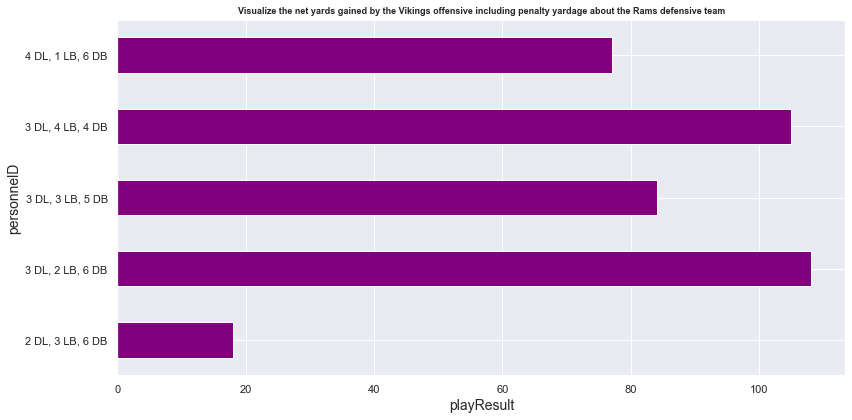

In [360]:
df_dataset4_plays[
    df_dataset4_plays['possessionTeam'] == 'MIN'
].groupby('personnelD')['playResult'].sum().plot(kind='barh', figsize=(12,6),color='purple')
plt.title('Visualize the net yards gained by the Vikings offensive including penalty yardage about the Rams defensive team', fontsize=9, fontweight='bold')
sns.set(style='darkgrid')
plt.ylabel('personnelD', fontsize=14)
plt.xlabel('playResult', fontsize=14)
plt.gca()
plt.tight_layout()
plt.show()

# The analyze data of play between the Minnesota Vikings and the Philadelphia Eagles 

In [361]:
df_dataset_plays[(df_dataset_plays['gameId'] == 2018100709) & (df_dataset_plays['possessionTeam'] == 'PHI')]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
5619,2018100709,318,(8:40) (Shotgun) C.Wentz pass incomplete short...,1,1,10,PHI,play_type_pass,PHI,20,...,0.0,08:40:00,30.0,0,0,I,0,0,-0.556405,False
5620,2018100709,340,(8:36) C.Wentz pass short left to Z.Ertz pushe...,1,2,10,PHI,play_type_pass,PHI,20,...,0.0,08:36:00,30.0,0,0,C,3,3,-0.640388,False
5621,2018100709,364,(7:56) (Shotgun) C.Wentz sacked at PHI 8 for -...,1,3,7,PHI,play_type_sack,PHI,23,...,0.0,07:56:00,33.0,0,0,S,-15,-15,-2.610341,False
5625,2018100709,539,(5:02) C.Wentz pass short right to Z.Ertz push...,1,1,10,PHI,play_type_pass,PHI,25,...,0.0,05:02:00,35.0,0,0,C,4,4,-0.258673,False
5630,2018100709,840,(14:35) (Shotgun) C.Wentz pass deep left to S....,2,1,10,PHI,play_type_pass,PHI,33,...,0.0,14:35:00,77.0,0,0,C,48,48,2.897753,False
5631,2018100709,885,(13:13) (Shotgun) C.Wentz pass short left to D...,2,2,8,PHI,play_type_pass,MIN,17,...,0.0,13:13:00,27.0,0,0,C,5,5,-0.030569,False
5632,2018100709,909,(12:30) (Shotgun) C.Wentz pass incomplete shor...,2,3,3,PHI,play_type_pass,MIN,12,...,0.0,12:30:00,22.0,0,0,I,0,0,-0.939306,False
5637,2018100709,1191,(6:53) (Shotgun) C.Wentz pass short left to N....,2,1,10,PHI,play_type_pass,PHI,35,...,3.0,06:53:00,75.0,0,0,C,13,13,0.769274,False
5638,2018100709,1215,(6:13) (Shotgun) C.Wentz pass short left to J....,2,1,10,PHI,play_type_pass,PHI,48,...,3.0,06:13:00,62.0,0,0,C,5,5,-0.082058,False
5639,2018100709,1260,(5:01) (Shotgun) C.Wentz pass short left to D....,2,1,10,PHI,play_type_pass,MIN,42,...,3.0,05:01:00,52.0,0,0,C,11,11,0.587418,False


In [362]:
df_dataset5_plays = df_dataset_plays.loc[[5619,5620,5621,5625, 5630,5631,5632,5637,5638,5639,5640,5641,5642,5651,5652,5653,5658,5659,5660,5661,5662,5663,5664,5667,5668,5669,5670,5671,5672,5674,5675,5676,5683,5684,5685,5686,5687,5688],:]

In [363]:
pd.crosstab(index=df_dataset5_plays.penaltyCodes, columns=df_dataset5_plays.penaltyJerseyNumbers)

penaltyJerseyNumbers,0,MIN 20,PHI 11
penaltyCodes,,,
0,36,0,0
DH,0,1,0
ING,0,0,1


In [364]:
df_dataset5_plays['offenseFormation'].value_counts()

SHOTGUN       23
EMPTY         11
SINGLEBACK     3
0              1
Name: offenseFormation, dtype: int64

In [365]:
print('Unique values in `state` column:', list(df_dataset5_plays.personnelD.unique()))

Unique values in `state` column: ['4 DL, 2 LB, 5 DB', '4 DL, 3 LB, 4 DB']


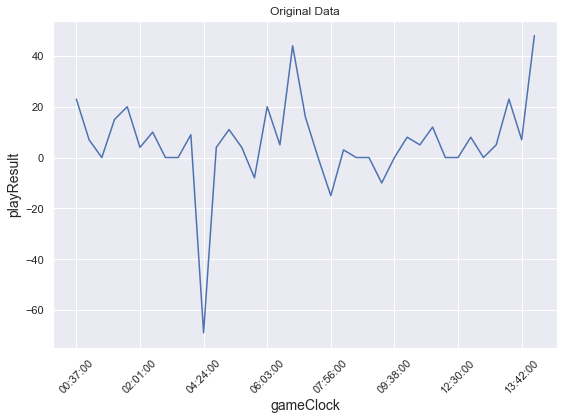

In [366]:
#Visualize how many net yards gained by the offense of the Philadelphia Eagles team throughout time on clock of play
df_dataset5_plays[df_dataset5_plays['possessionTeam'] == 'PHI'].groupby('gameClock')['playResult'].sum().plot(kind='line', color='b', figsize=(8,6))
plt.xlabel('gameClock', fontsize=14)
plt.ylabel('playResult', fontsize=14)
plt.title('Original Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

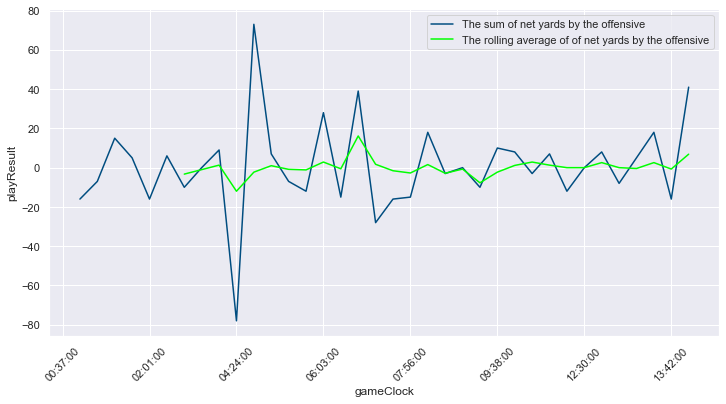

In [367]:
ax = df_dataset5_plays[df_dataset5_plays['possessionTeam'] == 'PHI'].groupby('gameClock')['playResult'].sum().diff(periods=1).plot(
 kind='line', grid=True, color='#004d80', style='-', label='The sum of net yards by the offensive', figsize=(12,6)
)
ax = df_dataset5_plays[df_dataset5_plays['possessionTeam'] == 'PHI'].groupby('gameClock')['playResult'].sum().diff(periods=1).rolling(window=7).mean().plot(
  kind='line', grid=True, color='#00ff00', style='-', label='The rolling average of of net yards by the offensive', figsize=(12,6), ax=ax
)
ax.set_ylabel('playResult')
_ = ax.legend()
_ = ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=45)

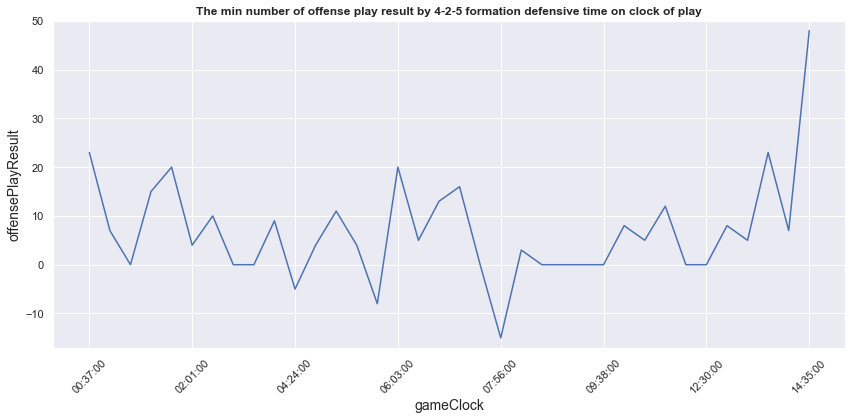

In [368]:
df_dataset5_plays[df_dataset5_plays['personnelD'] == '4 DL, 2 LB, 5 DB'].groupby('gameClock')['offensePlayResult'].min().plot(kind='line',color='b', figsize=(12,6))
plt.title('The min number of offense play result by 4-2-5 formation defensive time on clock of play', fontsize=12, fontweight='bold')
plt.xlabel('gameClock', fontsize=14)
plt.ylabel('offensePlayResult', fontsize=14)
plt.ylim(-17,50)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CHICAGO BEARS vs MINNESOTA VIKINGS

In [369]:
df_dataset6_plays = df_dataset_plays[(df_dataset_plays['gameId'] == 2018111802)]

In [370]:
df_dataset6_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
11140,2018111802,59,(15:00) (Shotgun) K.Cousins pass short left to...,1,1,10,MIN,play_type_pass,MIN,25,...,0.0,15:00:00,35.0,0,0,C,8,8,0.009422,False
11141,2018111802,278,(9:39) (No Huddle) M.Trubisky pass short right...,1,2,3,CHI,play_type_pass,MIN,40,...,0.0,09:39:00,50.0,0,0,C,5,5,0.655686,False
11142,2018111802,307,(8:57) (Shotgun) M.Trubisky pass short left to...,1,1,10,CHI,play_type_pass,MIN,35,...,0.0,08:57:00,45.0,0,0,C,6,6,0.028585,False
11143,2018111802,332,(8:29) (No Huddle) M.Trubisky pass short right...,1,2,4,CHI,play_type_pass,MIN,29,...,0.0,08:29:00,39.0,0,0,C,14,14,1.113407,False
11144,2018111802,403,(7:16) (Shotgun) M.Trubisky sacked at MIN 21 f...,1,2,11,CHI,play_type_sack,MIN,16,...,0.0,07:16:00,26.0,0,0,S,-5,-5,-0.796631,False


In [371]:
df_dataset6_plays[df_dataset6_plays['possessionTeam'] == 'MIN'].groupby('gameClock')['playResult'].sum()


gameClock
00:00:00    25
00:21:00     0
00:25:00     0
00:39:00    25
00:44:00    11
00:50:00     7
00:52:00     5
01:09:00     7
01:24:00     0
01:31:00     6
01:48:00    16
01:52:00    -8
01:53:00     0
01:59:00    11
02:06:00     9
02:24:00     5
02:27:00    -2
02:31:00     0
02:35:00    18
02:41:00    13
02:48:00     0
03:13:00     9
03:22:00     0
04:36:00     0
04:55:00    13
05:04:00     0
05:20:00    12
05:26:00     0
05:37:00     0
05:43:00     0
05:47:00    -5
05:52:00     0
06:05:00    11
06:31:00     4
07:00:00    13
07:27:00     6
08:06:00     0
08:24:00     9
08:38:00     0
08:51:00     7
10:11:00    11
10:44:00    12
12:33:00    -8
13:07:00    10
13:24:00     0
14:12:00     0
14:19:00    11
15:00:00     8
Name: playResult, dtype: int64

In [372]:
df_dataset6_plays['possessionTeam'].value_counts(ascending=True)

CHI    33
MIN    50
Name: possessionTeam, dtype: int64

In [373]:
df_dataset6_plays[df_dataset6_plays['possessionTeam'] == 'CHI'].groupby('gameClock')['playResult'].sum()


gameClock
00:00:00   -10
00:33:00     9
00:53:00     2
02:00:00    15
02:33:00     6
02:55:00     0
03:37:00     0
03:43:00     0
03:46:00     6
03:57:00    17
04:04:00     0
06:07:00    18
06:17:00     7
06:36:00     6
06:52:00    10
07:16:00    -5
07:31:00     4
08:29:00    14
08:52:00     0
08:57:00     6
09:38:00     7
09:39:00     5
09:42:00     0
10:20:00    12
10:27:00     0
11:14:00     8
11:21:00     0
11:38:00     0
11:46:00    10
12:25:00     6
12:34:00    12
14:19:00     0
14:33:00     0
Name: playResult, dtype: int64

In [374]:
pd.crosstab(index=df_dataset6_plays.possessionTeam, columns=df_dataset6_plays.personnelD)

personnelD,"2 DL, 3 LB, 6 DB","2 DL, 4 LB, 5 DB","3 DL, 2 LB, 6 DB","3 DL, 3 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 3 LB, 4 DB","5 DL, 2 LB, 4 DB"
possessionTeam,,,,,,,
CHI,0,0,2,0,31,0,0
MIN,2,3,0,43,0,1,1


In [375]:
df_dataset6_plays[(df_dataset6_plays['possessionTeam'] == 'CHI')
                ].groupby(['possessionTeam','personnelD'])['playResult'].sum()

possessionTeam  personnelD      
CHI             3 DL, 2 LB, 6 DB     17
                4 DL, 2 LB, 5 DB    148
Name: playResult, dtype: int64

In [376]:
df_dataset6_plays[(df_dataset6_plays['possessionTeam'] == 'MIN')
                ].groupby(['possessionTeam','personnelD'])['playResult'].sum()

possessionTeam  personnelD      
MIN             2 DL, 3 LB, 6 DB      6
                2 DL, 4 LB, 5 DB     11
                3 DL, 3 LB, 5 DB    247
                4 DL, 3 LB, 4 DB      7
                5 DL, 2 LB, 4 DB      0
Name: playResult, dtype: int64

# The analize data for all teams of the regular season  2018

In [377]:
df_dataset_plays = df_dataset_plays.drop(columns=['gameId', 'playId', 'playDescription','yardlineSide','gameClock'], inplace=False)

In [378]:
df_dataset_plays.columns

Index(['quarter', 'down', 'yardsToGo', 'possessionTeam', 'playType',
       'yardlineNumber', 'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'absoluteYardlineNumber',
       'penaltyCodes', 'penaltyJerseyNumbers', 'passResult',
       'offensePlayResult', 'playResult', 'epa', 'isDefensivePI'],
      dtype='object')

In [379]:
df_dataset_plays.describe()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,offensePlayResult,playResult,epa
count,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000,19233.000000
mean,2.591067,1.920345,8.924089,29.860136,6.036032,4.209484,10.700463,12.384339,57.934124,6.279572,6.470285,0.020649
std,1.123109,0.848802,3.974605,12.444665,1.014045,0.883942,9.640624,10.386952,25.588255,10.185151,10.567929,1.580978
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,-78.000000,-11.935951
25%,2.000000,1.000000,6.000000,22.000000,6.000000,4.000000,3.000000,3.000000,38.000000,0.000000,0.000000,-0.745851
50%,3.000000,2.000000,10.000000,30.000000,6.000000,4.000000,9.000000,10.000000,58.000000,4.000000,4.000000,-0.190831
75%,4.000000,3.000000,10.000000,40.000000,7.000000,5.000000,17.000000,20.000000,79.000000,10.000000,11.000000,0.976993
max,5.000000,4.000000,41.000000,50.000000,11.000000,10.000000,51.000000,54.000000,109.000000,97.000000,97.000000,8.629316


In [380]:
# The average number of defenders in close proximity to line-of-scrimmage
math.floor(df_dataset_plays.defendersInTheBox.mean())

6

In [381]:
# The average number of pass rushers
math.floor(df_dataset_plays.numberOfPassRushers.mean())

4

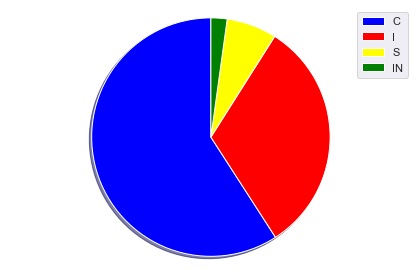

In [382]:
temp = df_dataset_plays['passResult'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['blue', 'red', 'yellow', 'green']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [383]:
df_dataset_plays['possessionTeam'].value_counts(ascending=True)

SEA    462
TEN    495
LAC    506
MIA    527
CHI    545
BUF    553
NO     555
ARI    556
NYJ    566
SF     567
WAS    570
HOU    589
KC     595
DEN    597
JAX    598
CIN    599
DAL    602
CAR    604
BAL    607
NE     615
OAK    617
LA     619
MIN    622
CLE    633
DET    640
NYG    644
PHI    662
ATL    668
IND    685
TB     693
GB     704
PIT    738
Name: possessionTeam, dtype: int64

In [384]:
df_dataset_plays.groupby('possessionTeam').playResult.agg(['count','min','max','mean'])

,count,min,max,mean
possessionTeam,,,,
ARI,556,-20,75,4.839928
ATL,668,-25,75,7.227545
BAL,607,-78,74,5.995058
BUF,553,-66,75,5.383363
CAR,604,-15,82,6.591060
CHI,545,-18,70,6.928440
CIN,599,-17,49,5.863105
CLE,633,-14,70,6.644550
DAL,602,-14,90,6.089701


In [385]:
group_possesion_team = df_dataset_plays.groupby('possessionTeam')

In [386]:
group_possesion_team 

In [387]:
group_possesion_team.groups

{'ARI': [633, 634, 635, 639, 640, 645, 646, 657, 658, 659, 662, 663, 669, 670, 671, 672, 673, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 692, 693, 694, 695, 696, 1879, 1880, 1881, 1886, 1887, 1891, 1892, 1898, 1899, 1900, 1901, 1908, 1909, 1910, 1914, 1915, 1916, 1920, 1921, 1926, 1927, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 3134, 3135, 3136, 3140, 3145, 3152, 3153, 3161, 3162, 3163, 3166, 3167, 3170, 3171, 3172, 3178, 3179, 3180, 3185, 3186, 3187, 3188, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 4170, 4171, 4172, 4178, 4179, 4180, ...], 'ATL': [0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 15, 16, 24, 25, 26, 27, 33, 34, 35, 36, 43, 44, 45, 46, 53, 54, 57, 58, 59, 60, 61, 63, 65, 66, 67, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 1399, 1400, 1401, 1405, 1406, 1407, 1408, 1415, 1416, 1417, 1418, 1423, 1424, 1425, 1426, 1427, 1428, 1430, 1431, 1434, 1440, 1441, 1442, 1451, 1452, 1453, 1458, 1464, 2604, 2605, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2622,

In [388]:
group_possesion_team.get_group('KC')

,quarter,down,yardsToGo,possessionTeam,playType,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,...,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
1475,1,2,15,KC,play_type_pass,15,EMPTY,"1 RB, 1 TE, 3 WR",5,3,...,0.0,0.0,25.0,0,0,C,15,15,2.389219,False
1478,1,2,9,KC,play_type_pass,30,EMPTY,"0 RB, 1 TE, 4 WR",6,3,...,7.0,0.0,80.0,0,0,C,10,10,1.164486,False
1479,1,1,10,KC,play_type_pass,40,SHOTGUN,"1 RB, 1 TE, 3 WR",7,4,...,7.0,0.0,70.0,0,0,C,40,40,2.353107,False
1480,1,2,9,KC,play_type_pass,19,SHOTGUN,"1 RB, 1 TE, 3 WR",6,4,...,7.0,0.0,29.0,0,0,C,19,19,2.654171,False
1488,1,1,10,KC,play_type_pass,39,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,5,...,14.0,0.0,71.0,0,0,C,17,17,1.095161,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19062,1,1,10,KC,play_type_unknown,32,SHOTGUN,"1 RB, 1 TE, 3 WR",6,4,...,9.0,10.0,0.0,DPI,OAK 23,I,0,26,1.613536,True
19090,1,1,10,KC,play_type_unknown,13,SINGLEBACK,"2 RB, 2 TE, 1 WR",8,4,...,9.0,10.0,0.0,DPI,BAL 29,I,0,12,0.805474,True
19091,4,2,18,KC,play_type_unknown,42,SHOTGUN,"1 RB, 1 TE, 3 WR",6,4,...,9.0,10.0,0.0,DH,BAL 48,C,17,5,0.695113,False
19129,4,3,10,KC,play_type_unknown,37,SHOTGUN,"1 RB, 2 TE, 2 WR",5,4,...,9.0,10.0,0.0,DH,LAC 20,I,0,5,1.744692,False


In [389]:
df_dataset_plays.groupby('personnelD').playResult.agg(['count','min','max','mean'])

,count,min,max,mean
personnelD,,,,
0,26,0,0,0.000000
"0 DL, 2 LB, 4 DB, 3 RB,2 WR",1,12,12,12.000000
"0 DL, 3 LB, 3 DB, 2 RB,2 TE,1 WR",1,7,7,7.000000
"0 DL, 3 LB, 4 DB, 3 RB,1 QB",1,66,66,66.000000
"0 DL, 4 LB, 4 DB, 1 RB,2 WR",1,10,10,10.000000
"0 DL, 4 LB, 4 DB, 1 TE,2 WR",1,15,15,15.000000
"0 DL, 4 LB, 7 DB",32,-10,40,4.687500
"0 DL, 5 LB, 6 DB",17,-15,34,4.176471
"0 DL, 6 LB, 5 DB",6,-4,19,2.666667


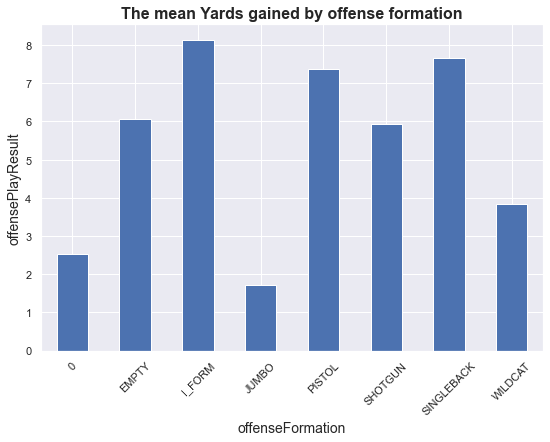

In [390]:
#The mean Yards gained by offense formation not including penalty yardage
df_dataset_plays.groupby('offenseFormation').offensePlayResult.mean().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation=45)
plt.xlabel('offenseFormation', fontsize=14)
plt.ylabel('offensePlayResult',fontsize=14)
plt.title('The mean Yards gained by offense formation', fontsize=16, fontweight='bold')
plt.show()

In [391]:
group_ofensive_formation = df_dataset_plays.groupby('offenseFormation')

In [392]:
group_ofensive_formation

In [393]:
group_ofensive_formation.groups

{0: [173, 727, 1088, 1090, 1173, 1597, 1640, 1647, 1700, 1786, 2200, 2235, 2238, 2382, 2413, 2456, 2565, 2794, 3301, 3480, 3750, 3776, 4224, 4311, 4341, 4836, 4858, 5323, 5409, 5443, 5445, 5567, 5687, 6233, 6309, 6490, 6567, 6937, 7381, 7734, 8328, 8485, 8774, 8894, 8940, 9137, 9222, 9686, 9719, 10117, 10213, 10328, 10443, 10538, 10779, 10864, 10936, 10938, 11491, 11493, 11587, 11642, 11693, 11698, 11730, 11770, 12217, 12457, 12745, 12827, 12886, 13002, 13638, 13640, 13972, 13974, 14249, 15486, 15663, 15665, 15835, 15868, 15889, 15896, 16262, 16294, 16356, 16399, 16483, 16936, 17268, 17492, 17507, 18194, 18465, 18606, 18618, 18629, 18658, 18678, ...], 'EMPTY': [6, 42, 45, 49, 81, 82, 83, 91, 97, 98, 115, 124, 136, 158, 160, 164, 166, 170, 184, 192, 193, 196, 218, 219, 220, 235, 239, 241, 248, 253, 264, 272, 291, 300, 302, 303, 304, 315, 335, 341, 350, 353, 357, 360, 371, 379, 384, 385, 403, 405, 410, 415, 416, 425, 441, 444, 452, 457, 458, 459, 468, 469, 471, 484, 501, 506, 511, 519, 5

In [394]:
group_personnel_ofensive = df_dataset_plays.groupby('personnelO')

In [395]:
group_personnel_ofensive

In [396]:
group_personnel_ofensive.groups

{0: [18629, 18658, 18690, 18698, 18699, 18722, 18775, 18780, 18790, 18832, 18865, 18869, 18883, 18919, 18939, 18963, 18996, 19039, 19044, 19046, 19114, 19118, 19141, 19143, 19155, 19210], '0 RB, 0 TE, 5 WR': [12748, 15490, 15491, 15494, 15500, 16139, 16153, 16154, 16155, 16156, 16157, 16158, 16159, 16160, 16169, 16170, 16171, 16187, 17181, 17182, 17183, 17184, 17185, 17186, 17224, 17225, 17226, 17228, 17229, 17230, 17269, 17928, 17944, 17988, 18724, 19166], '0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K': [10328], '0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB': [14249], '0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB': [16262, 18194], '0 RB, 1 TE, 4 WR': [90, 97, 98, 131, 165, 359, 1289, 1320, 1399, 1407, 1441, 1478, 1498, 1499, 1500, 1501, 1502, 1520, 1535, 1538, 1550, 1805, 2356, 2610, 2651, 2692, 2737, 2761, 2811, 2949, 2963, 3334, 3344, 3382, 3422, 3423, 3786, 3915, 3916, 4146, 4154, 4155, 4280, 4306, 4307, 4487, 4491, 4498, 4502, 4503, 4505, 4510, 4511, 4533, 4538, 4539, 4540, 4541, 4542, 4618, 4625, 

In [397]:
df_dataset_plays['personnelO'].value_counts(ascending=True)

2 QB, 1 RB, 1 TE, 1 WR,1 DL                     1
1 RB, 1 TE, 1 WR,1 P,4 LB,1 LS,1 DL,1 DB        1
1 RB, 2 TE, 1 WR,1 P,2 LB,1 LS,3 DB             1
0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K              1
1 RB, 0 TE, 0 WR,1 P,4 LB,1 LS,3 DB             1
1 RB, 0 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB        1
1 RB, 1 TE, 2 WR,1 P,3 LB,1 LS,2 DB             1
1 RB, 0 TE, 3 WR,1 DL                           1
4 RB, 1 TE, 0 WR                                1
6 OL, 0 RB, 0 TE, 0 WR,4 DL                     1
2 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,2 DB             1
7 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 K             1
0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB        1
2 QB, 2 RB, 2 TE, 0 WR                          1
1 RB, 1 TE, 2 WR                                1
6 OL, 1 RB, 1 TE, 1 WR,1 DL                     1
0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB             1
1 RB, 0 TE, 3 WR,1 DB                           1
0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K              1
1 RB, 1 TE, 2 WR,1 DB                           1


In [398]:
df_dataset_plays.groupby('personnelO').offensePlayResult.agg(['count','min','max','mean'])

,count,min,max,mean
personnelO,,,,
0,26,-1,39,7.076923
"0 RB, 0 TE, 5 WR",36,-9,23,5.916667
"0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K",1,4,4,4.000000
"0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB",1,7,7,7.000000
"0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB",2,0,7,3.500000
"0 RB, 1 TE, 4 WR",173,-15,78,6.323699
"0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K",1,2,2,2.000000
"0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB",1,66,66,66.000000
"0 RB, 2 TE, 3 WR",51,-8,76,7.117647


In [399]:
df_dataset_plays.groupby('personnelO').defendersInTheBox.mean()

personnelO
0                                            6.000000
0 RB, 0 TE, 5 WR                             5.138889
0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K           6.000000
0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB     6.000000
0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB     6.000000
0 RB, 1 TE, 4 WR                             5.138728
0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K           6.000000
0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB          6.000000
0 RB, 2 TE, 3 WR                             5.352941
0 RB, 3 TE, 2 WR                             6.000000
1 RB, 0 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB     6.000000
1 RB, 0 TE, 0 WR,1 P,4 LB,1 LS,3 DB          6.000000
1 RB, 0 TE, 3 WR,1 DB                        7.000000
1 RB, 0 TE, 3 WR,1 DL                        6.000000
1 RB, 0 TE, 4 WR                             5.395604
1 RB, 1 TE, 1 WR,1 P,4 LB,1 LS,1 DL,1 DB     6.000000
1 RB, 1 TE, 2 WR                             6.000000
1 RB, 1 TE, 2 WR,1 DB                        6.000000
1 RB, 1 TE, 2 WR,

In [400]:
#The frequency of distirbution number of defenders in close proximity to line-of-scrimmage 
frequency_distribution =df_dataset_plays['defendersInTheBox']
frequency_distribution.sort_values(ascending=True)

8582      1
2519      1
1708      2
14248     2
11160     2
         ..
1225     11
7292     11
18818    11
1197     11
15646    11
Name: defendersInTheBox, Length: 19233, dtype: int64

In [401]:
at = frequency_distribution.max() - frequency_distribution.min()
at

10

In [402]:
#calculate the class amplitude value
k = math.sqrt(len(frequency_distribution))
h = at/k 
h = math.ceil(h)

In [403]:
frequencias = []

smallest = round(frequency_distribution.min(),1)
smallest_amp = round(smallest+h,1)

value = smallest
while value < frequency_distribution.max():
    frequencias.append('{} - {}'.format(round(value,1),round(value+h,1)))
    value += h

In [404]:
freq_abs = pd.qcut(frequency_distribution,len(frequencias), duplicates='drop')  
print(pd.value_counts(freq_abs))

(5.0, 6.0]      8882
(0.999, 5.0]    4769
(6.0, 7.0]      4400
(7.0, 11.0]     1182
Name: defendersInTheBox, dtype: int64


In [405]:
df_dataset_plays['personnelD'].value_counts(ascending=True)

1 DL, 3 LB, 6 DB, 1 WR                 1
0 DL, 3 LB, 4 DB, 3 RB,1 QB            1
4 DL, 4 LB, 2 DB                       1
4 DL, 3 LB, 3 DB, 1 WR                 1
5 DL, 4 LB, 2 DB                       1
3 DL, 5 LB, 3 DB                       1
1 DL, 3 LB, 5 DB, 1 TE,1 WR            1
3 DL, 3 LB, 4 DB, 1 WR                 1
3 DL, 0 LB, 8 DB                       1
1 DL, 4 LB, 5 DB, 1 RB                 1
2 DL, 4 LB, 4 DB, 1 RB                 1
2 DL, 4 LB, 4 DB                       1
0 DL, 4 LB, 4 DB, 1 TE,2 WR            1
1 DL, 4 LB, 5 DB                       1
1 DL, 2 LB, 7 DB                       1
0 DL, 2 LB, 4 DB, 3 RB,2 WR            1
0 DL, 4 LB, 4 DB, 1 RB,2 WR            1
7 DL, 3 LB, 1 DB                       1
5 DL, 5 LB, 1 DB                       1
0 DL, 3 LB, 3 DB, 2 RB,2 TE,1 WR       1
1 DL, 4 LB, 3 DB, 1 RB,2 WR            1
2 DL, 2 LB, 6 DB, 1 WR                 1
3 DL, 2 LB, 5 DB                       1
4 DL, 2 LB, 4 DB                       2
3 DL, 1 LB, 6 DB

In [406]:
group_personnel_defensive = df_dataset_plays.groupby('personnelD')

In [407]:
group_personnel_defensive

In [408]:
group_personnel_defensive.groups

{0: [18629, 18658, 18690, 18698, 18699, 18722, 18775, 18780, 18790, 18832, 18865, 18869, 18883, 18919, 18939, 18963, 18996, 19039, 19044, 19046, 19114, 19118, 19141, 19143, 19155, 19210], '0 DL, 2 LB, 4 DB, 3 RB,2 WR': [11587], '0 DL, 3 LB, 3 DB, 2 RB,2 TE,1 WR': [14249], '0 DL, 3 LB, 4 DB, 3 RB,1 QB': [1647], '0 DL, 4 LB, 4 DB, 1 RB,2 WR': [4341], '0 DL, 4 LB, 4 DB, 1 TE,2 WR': [10443], '0 DL, 4 LB, 7 DB': [2561, 2562, 3278, 3306, 3317, 3323, 3328, 3329, 3330, 3331, 3332, 3333, 4574, 4575, 4576, 4577, 8582, 10873, 10920, 12579, 12611, 12623, 13274, 13312, 13329, 13330, 13331, 13345, 13346, 15940, 18538, 18539], '0 DL, 5 LB, 6 DB': [518, 523, 538, 2118, 2400, 3525, 3553, 3557, 3612, 3613, 3734, 5894, 6923, 7926, 11371, 11377, 15522], '0 DL, 6 LB, 5 DB': [334, 362, 382, 3533, 3537, 3568], '1 DL, 2 LB, 7 DB': [17748], '1 DL, 3 LB, 5 DB, 1 TE,1 WR': [8774], '1 DL, 3 LB, 6 DB, 1 WR': [16727], '1 DL, 3 LB, 7 DB': [775, 782, 783, 799, 802, 827, 833, 834, 835, 836, 837, 838, 839, 1124, 1172, 

In [409]:
group_personnel_defensive.get_group('4 DL, 3 LB, 4 DB')

,quarter,down,yardsToGo,possessionTeam,playType,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,...,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
15,1,1,10,ATL,play_type_pass,20,I_FORM,"2 RB, 1 TE, 2 WR",8,4,...,3.0,0.0,90.0,0,0,I,0,0,-0.551513,False
17,2,1,10,PHI,play_type_pass,40,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,4,...,3.0,0.0,70.0,0,0,C,1,1,-0.436368,False
22,2,1,19,PHI,play_type_pass,19,SHOTGUN,"1 RB, 2 TE, 2 WR",6,4,...,3.0,0.0,29.0,0,0,I,0,0,-0.196980,False
24,2,2,8,ATL,play_type_pass,27,SINGLEBACK,"1 RB, 3 TE, 1 WR",7,4,...,3.0,3.0,37.0,0,0,C,22,22,1.703731,False
41,3,2,9,PHI,play_type_pass,42,SINGLEBACK,"1 RB, 2 TE, 2 WR",8,4,...,6.0,3.0,68.0,0,0,I,0,0,-0.910225,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19202,1,1,10,SEA,play_type_unknown,41,I_FORM,"2 RB, 1 TE, 2 WR",7,4,...,9.0,10.0,0.0,DPI,KC 20,I,0,26,1.576878,True
19206,2,1,10,OAK,play_type_unknown,28,EMPTY,"2 RB, 1 TE, 2 WR",6,4,...,9.0,10.0,0.0,DPI,DEN 51,C,8,6,0.380013,True
19213,2,3,18,NE,play_type_unknown,18,SHOTGUN,"2 RB, 1 TE, 2 WR",6,4,...,9.0,10.0,0.0,RPS,NYJ 96,I,0,9,1.252091,False
19226,3,2,9,BAL,play_type_unknown,22,PISTOL,"1 RB, 2 TE, 2 WR",7,4,...,9.0,10.0,0.0,OPI,BAL 15,C,12,-10,-1.053116,False


In [410]:
df_dataset_plays['typeDropback'].value_counts(ascending=True)

UNKNOWN                      97
DESIGNED_ROLLOUT_LEFT       141
SCRAMBLE_ROLLOUT_LEFT       462
DESIGNED_ROLLOUT_RIGHT      482
0                           633
SCRAMBLE                    677
SCRAMBLE_ROLLOUT_RIGHT     1096
TRADITIONAL               15645
Name: typeDropback, dtype: int64

In [411]:
group_type_dropback = df_dataset_plays.groupby('typeDropback')

In [412]:
group_type_dropback

In [413]:
group_type_dropback.groups

{0: [506, 1832, 2651, 6485, 12296, 15835, 18606, 18607, 18608, 18609, 18610, 18611, 18612, 18613, 18614, 18615, 18616, 18617, 18618, 18619, 18620, 18621, 18622, 18623, 18624, 18625, 18626, 18627, 18628, 18629, 18630, 18631, 18632, 18633, 18634, 18635, 18636, 18637, 18638, 18639, 18640, 18641, 18642, 18643, 18644, 18645, 18646, 18647, 18648, 18649, 18650, 18651, 18652, 18653, 18654, 18655, 18656, 18657, 18658, 18659, 18660, 18661, 18662, 18663, 18664, 18665, 18666, 18667, 18668, 18669, 18670, 18671, 18672, 18673, 18674, 18675, 18676, 18677, 18678, 18679, 18680, 18681, 18682, 18683, 18684, 18685, 18686, 18687, 18688, 18689, 18690, 18691, 18692, 18693, 18694, 18695, 18696, 18697, 18698, 18699, ...], 'DESIGNED_ROLLOUT_LEFT': [9, 262, 270, 293, 865, 915, 1047, 1186, 2181, 2219, 2401, 2415, 2514, 2576, 2708, 3073, 3429, 3441, 3459, 3494, 3501, 3526, 3850, 4420, 4826, 4844, 4877, 4916, 5016, 5198, 5364, 5478, 5571, 6073, 6112, 6211, 6529, 6554, 6674, 6871, 6882, 7130, 7326, 7461, 7646, 7765, 

In [414]:
df_dataset_plays['penaltyCodes'].value_counts(ascending=True)

DPI;DOF           1
ILM;DH            1
ICB               1
TAUd;DH           1
DPI;ICT;DH        1
              ...  
OPI              96
RPS             104
DH              238
DPI             242
0             18033
Name: penaltyCodes, Length: 87, dtype: int64

In [415]:
group_penaltyCodes = df_dataset_plays.groupby('penaltyCodes')

In [416]:
group_penaltyCodes

In [417]:
group_penaltyCodes.groups

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, ...], 'CHB': [12098], 'DH': [664, 1538, 1784, 1856, 2278, 2288, 2459, 2603, 3405, 3435, 3460, 3664, 3720, 3822, 3906, 4136, 4677, 5102, 5194, 5650, 5659, 6230, 6872, 7066, 7276, 7362, 7811, 7922, 7929, 8124, 9723, 10560, 10745, 11286, 11343, 11787, 11821, 12178, 12403, 12769, 12929, 13065, 13335, 13855, 14642, 14969, 15201, 15460, 15545, 16006, 16160, 17065, 17109, 17339, 18607, 18612, 18618, 18623, 18624, 18628, 18634, 18635, 18638, 18645, 18653, 18655, 18659, 18666, 18667, 18668, 18672, 18673, 18674, 18676, 18683, 18686, 18687, 18688, 18689, 18692, 18694, 18695, 18696, 18701, 18709, 18718, 1

In [418]:
group_penaltyJerseyNumbers = df_dataset_plays.groupby('penaltyJerseyNumbers')

In [419]:
group_penaltyJerseyNumbers

In [420]:
group_penaltyJerseyNumbers.groups

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, ...], 'ARI': [5567, 15757], 'ARI 20': [18761], 'ARI 21': [14969, 18762], 'ARI 23': [11676, 18796, 18836], 'ARI 28': [664, 18634, 18635, 18687], 'ARI 3': [8688], 'ARI 33': [628, 3191, 17151], 'ARI 36': [18633, 18793, 19050, 19117], 'ARI 38': [19115], 'ARI 41': [1912, 12662, 19194], 'ARI 43': [6569, 19230], 'ARI 44': [6529, 18729], 'ARI 55': [653, 8718, 15791], 'ARI 71': [10387, 10414, 12687], 'ARI 73': [6991], 'ARI 78;DET 38': [19118], 'ARI 84': [17159], 'ARI 86': [18795], 'ARI 90': [18730], 'ARI 91': [8716], 'ATL': [13011, 18062], 'ATL 17': [18917], 'ATL 2': [45], 'ATL 21': [3878, 18606, 18607

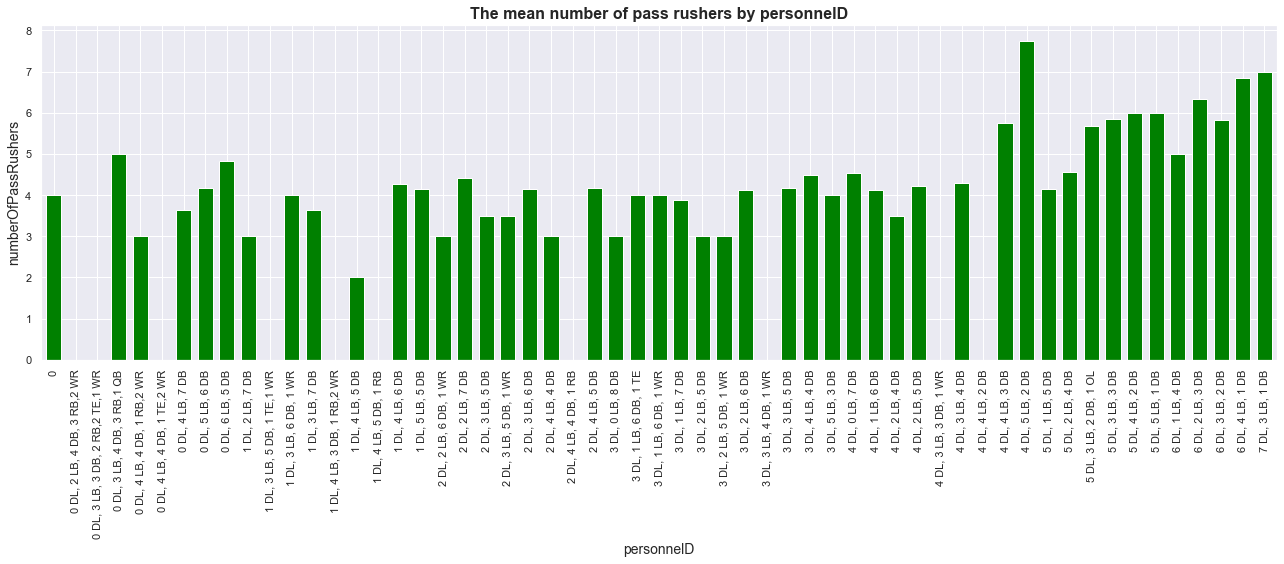

In [421]:
df_dataset_plays.groupby('personnelD').numberOfPassRushers.mean().plot(kind='bar', figsize=(18,8), color='green',width = 0.70)
plt.title('The mean number of pass rushers by personnelD', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('personnelD', fontsize=14)
plt.ylabel('numberOfPassRushers', fontsize=14)
plt.tight_layout()
plt.show()

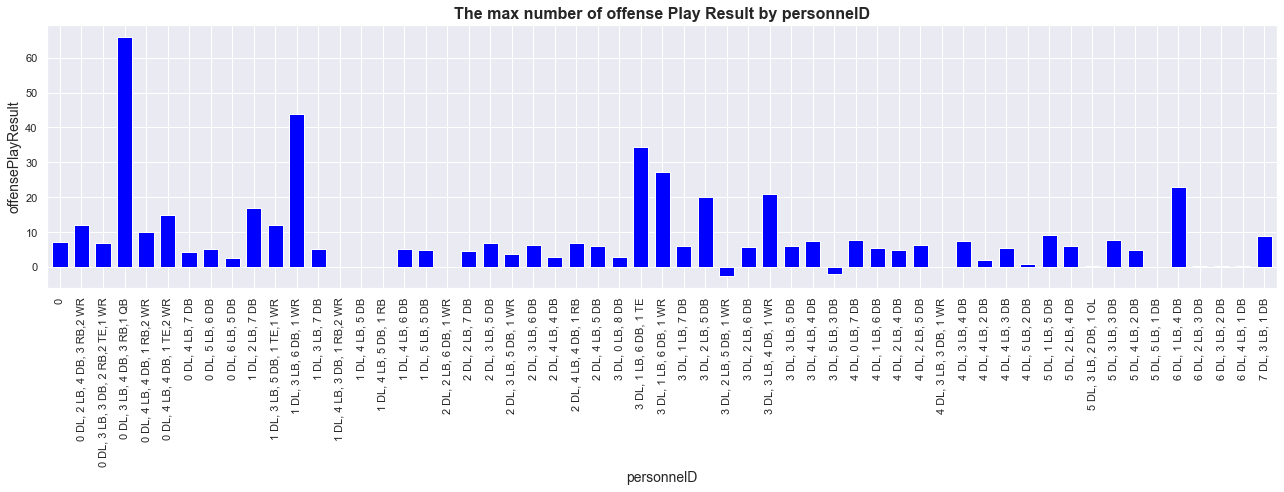

In [422]:
df_dataset_plays.groupby(['personnelD'])['offensePlayResult'].mean().plot(kind='bar', color='blue', figsize=(18,7), width=0.70)
plt.title('The max number of offense Play Result by personnelD', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('personnelD', fontsize=14)
plt.ylabel('offensePlayResult', fontsize=14)
plt.tight_layout()
plt.show()

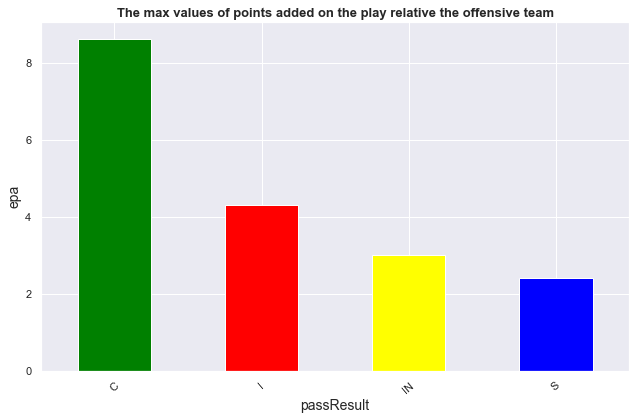

In [423]:
#The max of group values of expected points added on the play relative the offensive team by pass result
df_dataset_plays.groupby('passResult').epa.max().plot(kind='bar', color={'blue', 'red', 'green', 'yellow'}, figsize=(9,6))
plt.xticks(rotation=40)
plt.title('The max values of points added on the play relative the offensive team', fontsize=13, fontweight='bold')
plt.xlabel('passResult', fontsize=14)
plt.ylabel('epa',fontsize=14)
plt.tight_layout()
plt.show()

In [424]:
df_dataset_plays['isDefensivePI'].value_counts()

False    18974
True       259
Name: isDefensivePI, dtype: int64

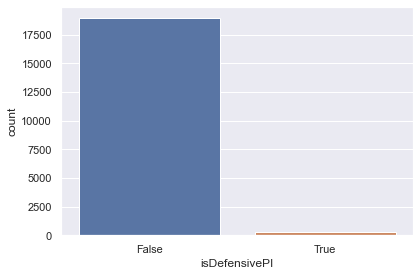

In [425]:
#The Estimator is explicitly counting the number of occurrences
sns.countplot(x='isDefensivePI',data=df_dataset_plays)
plt.tight_layout()

In [426]:
df_dataset_plays.head()

,quarter,down,yardsToGo,possessionTeam,playType,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,...,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,1,1,15,ATL,play_type_pass,20,I_FORM,"2 RB, 1 TE, 2 WR",7,4,...,0.0,0.0,90.0,0,0,C,10,10,0.261827,False
1,1,1,10,ATL,play_type_pass,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7,4,...,0.0,0.0,49.0,0,0,I,0,0,-0.372360,False
2,1,2,10,ATL,play_type_pass,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6,4,...,0.0,0.0,49.0,0,0,I,0,0,-0.702779,False
3,1,3,10,ATL,play_type_pass,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6,5,...,0.0,0.0,49.0,0,0,C,33,33,3.047530,False
4,1,3,1,ATL,play_type_pass,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8,6,...,0.0,0.0,11.0,0,0,I,0,0,-0.842272,False


In [427]:
df_dataset_plays = pd.get_dummies(df_dataset_plays, columns=['possessionTeam'], sparse=False)

In [428]:
df_dataset_plays = pd.get_dummies(df_dataset_plays, columns=['playType'])

In [429]:
print(df_dataset_plays['offenseFormation'].value_counts(ascending=True))

WILDCAT          36
JUMBO            51
0               138
PISTOL          250
I_FORM          915
EMPTY          2428
SINGLEBACK     2789
SHOTGUN       12626
Name: offenseFormation, dtype: int64


In [430]:
df_dataset_plays = pd.get_dummies(df_dataset_plays, columns=['offenseFormation'], sparse=False)

In [431]:
df_dataset_plays = pd.get_dummies(df_dataset_plays, columns=['personnelO'], sparse=False)

In [432]:
df_dataset_plays = pd.get_dummies(df_dataset_plays, columns=['personnelD'], sparse=False)

In [433]:
df_dataset_plays = pd.get_dummies(df_dataset_plays, columns=['typeDropback'], sparse=False)

In [434]:
df_dataset_plays = pd.get_dummies(df_dataset_plays, columns=['penaltyCodes'], sparse=False)

In [435]:
df_dataset_plays = pd.get_dummies(df_dataset_plays, columns=['penaltyJerseyNumbers'], sparse=False)

In [436]:
df_dataset_plays = pd.get_dummies(df_dataset_plays, columns=['passResult'], sparse=False)

In [437]:
df_dataset_plays.shape

(19233, 932)

In [438]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=3,
    random_state=42,
metric='manhattan').fit_transform(df_dataset_plays.iloc[:1000,1:])

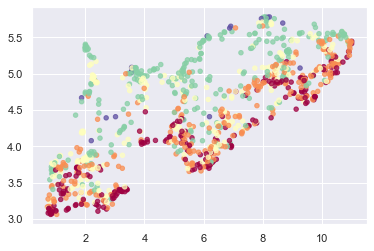

In [439]:
plt.scatter(clusterable_embedding[:1000, 0], clusterable_embedding[:1000, 1],
            c=df_dataset_plays.iloc[:1000,0], s=20, cmap='Spectral', alpha=0.75);

In [440]:
features1 = ['quarter','down', 'yardsToGo', 'yardlineNumber','defendersInTheBox','numberOfPassRushers', 'preSnapVisitorScore','preSnapHomeScore']

In [441]:
cluster1=df_dataset_plays[features1]

In [442]:
#random seed
np.random.seed(0)
m = [0,1]
c = [[1,0],
       [0,1]]
cluster1 = np.random.multivariate_normal(m, c, size=400)
X_mean = np.mean(cluster1, axis=0)
X_cov = np.cov(cluster1, rowvar=0)
X_diag = np.diag(X_cov)
X_stddev = np.sqrt(X_diag)

In [443]:
gmm = GaussianMixture(n_components=1, covariance_type='full', reg_covar=1e-6).fit(cluster1)
result = gmm.predict(cluster1)

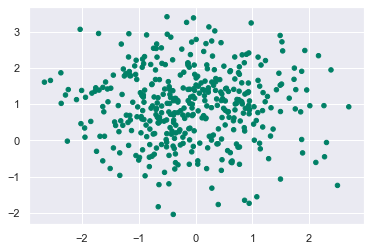

In [444]:
plt.scatter(cluster1[:,0], cluster1[:,1],
            c=result, s=20, cmap='summer');

In [445]:
probs = gmm.predict_proba(cluster1)
print(probs[:100].round(5))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


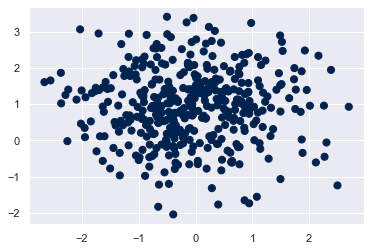

In [446]:
size = 50 * probs.max(1) ** 2 
plt.scatter(cluster1[:, 0], cluster1[:, 1], c=result, cmap='cividis', s=size);

In [447]:
print(gmm.score(cluster1))

-2.8303613277280117


In [448]:
print(gmm.score_samples(cluster1).shape)

(400,)


In [449]:
features1 = ['quarter','down', 'yardsToGo', 'yardlineNumber','defendersInTheBox','numberOfPassRushers']

In [450]:
cluster2=df_dataset_plays[features1]

In [451]:
cluster2.shape

(19233, 6)

In [452]:
np.random.seed(0)  # random seed
m = [4,1]
c = [[4,0],
       [0,4]]

cluster2 = np.random.multivariate_normal(m, c, size=100)
X_mean = np.mean(cluster2, axis=0)
X_cov = np.cov(cluster2, rowvar=0)
X_diag = np.diag(X_cov)
X_stddev = np.sqrt(X_diag)

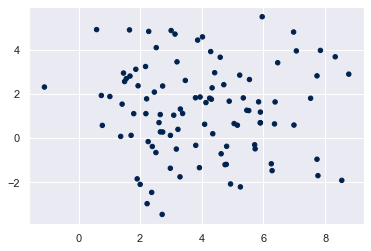

In [453]:
gmm = GaussianMixture(n_components=1, covariance_type ='diag',reg_covar=1e-6).fit(cluster2)
labels = gmm.predict(cluster2)
plt.scatter(cluster2[:,0], cluster2[:,1], c=labels, s=20, cmap='cividis');

In [454]:
print(gmm.lower_bound_) 

-4.261583364230394


In [455]:
print(gmm.n_iter_)

2


In [456]:
features2 = ['defendersInTheBox', 'offensePlayResult']

In [457]:
cluster3 =df_dataset_plays[features2]

In [458]:
cluster3.shape

(19233, 2)

In [459]:
cluster3.columns

Index(['defendersInTheBox', 'offensePlayResult'], dtype='object')

In [460]:
np.random.seed(0)  # random seed
m = [2,1]
c = [[2,0],
       [0,2]]

cluster3 = np.random.multivariate_normal(m, c, size=100)
X_mean = np.mean(cluster3, axis=0)
X_cov = np.cov(cluster3, rowvar=0)
X_diag = np.diag(X_cov)
X_stddev = np.sqrt(X_diag)

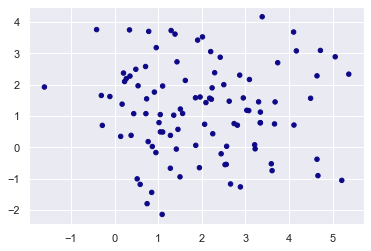

In [461]:
gmm = GaussianMixture(n_components=1, covariance_type='diag', reg_covar=1e-6).fit(cluster3)
labels = gmm.predict(cluster3)
plt.scatter(cluster3[:,0], cluster3[:,1], c=labels, s=20, cmap='plasma');

In [462]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):

    ax = ax or plt.gca()
    
    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, cluster3, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(cluster3).predict(cluster3)
    if label:
        ax.scatter(cluster3[:, 0], cluster3[:, 1], c=labels, s=20, cmap='viridis', zorder=2)
    else:
        ax.scatter(cluster3[:, 0], cluster3[:, 1], s=20, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covariances_, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covariances_, alpha=w * w_factor)

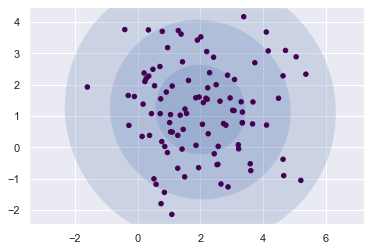

In [463]:
gmm = GaussianMixture( n_components=1,covariance_type='full', reg_covar=1e-6)
plot_gmm(gmm, cluster3)

Reference:

https://arxiv.org/abs/1906.11373